# Relatório de Entrega do Desafio Final

Bootcamp: Data Science

Aluno: André Moreira Pimentel

### Introdução

Este estudo tem como objetivo realizar uma análise exploratória de dados (EDA) sobre o consumo de energia elétrica no Brasil, abrangendo diferentes tipos de consumidores, estados e regiões ao longo de um período extenso. A análise é essencial para compreender a dinâmica do setor elétrico e fornecer insights que auxiliem na formulação de estratégias e políticas públicas. 

O trabalho será estruturado da seguinte maneira:

1. **Identificação de Tendências de Consumo**:
   - Avaliar a evolução do consumo de energia ao longo do tempo.

2. **Análise de Padrões Regionais e Temporais**:
   - Comparar o comportamento de consumo entre regiões e estados.
   - Examinar a sazonalidade e os padrões de consumo ao longo dos meses e anos.

### Passo a Passo da Análise Exploratória de Dados (EDA)

1. **Compreensão dos Dados**:
   - Leitura e análise preliminar do conjunto de dados para identificar seu escopo, variáveis disponíveis e possíveis limitações.
   - Verificação de integridade dos dados (valores ausentes, duplicados ou inconsistentes).

2. **Tratamento dos Dados**:
   - Limpeza dos dados para corrigir inconsistências.
   - Transformação das variáveis, como criação de categorias e normalização, para facilitar a análise.

3. **Análise Descritiva**:
   - Estatísticas descritivas (média, mediana, desvio padrão) para obter uma visão geral do consumo.
   - Criação de visualizações básicas, como histogramas e boxplots, para identificar outliers e distribuições.

4. **Identificação de Tendências Temporais**:
   - Análise do consumo ao longo dos anos para identificar tendências de alta, queda ou estabilidade.
   - Estudo sazonal para verificar padrões de consumo recorrentes.

5. **Estudo Regional e Por Tipo de Consumidor**:
   - Comparação do consumo entre regiões e estados.
   - Análise segmentada por tipo de consumidor (residencial, comercial, industrial, entre outros).

6. **Identificação de Correlações**:
   - Análise da relação entre consumo e número de consumidores.
   - Avaliação de possíveis influências externas, como políticas públicas ou eventos econômicos.

7. **Visualização Avançada**:
   - Uso de gráficos detalhados para apresentar padrões regionais e temporais.
   - Representações visuais que evidenciem as variações e correlações mais relevantes.

8. **Interpretação e Documentação**:
   - Síntese dos resultados em insights estratégicos.
   - Relatório detalhado com as descobertas e sugestões de ações futuras.

Esse processo permitirá uma compreensão abrangente do comportamento de consumo de energia no Brasil, oferecendo subsídios para tomadas de decisão mais informadas e direcionadas ao aprimoramento do setor elétrico.

## Importando bibliotecas

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


## Coleta de dados

In [2]:
df_consumo = pd.read_csv(r'data\consumo_energia_eletrica.csv')

In [3]:
df_estado = pd.read_csv(r'data\estado_regiao.csv', encoding='latin1',sep=';')

In [4]:
df_estado.head()

,id_estado,sigla,estado,regiao,pais
0,1,AC,Acre,Norte,Brasil
1,2,AL,Alagoas,Nordeste,Brasil
2,3,AP,Amapá,Norte,Brasil
3,4,AM,Amazonas,Norte,Brasil
4,5,BA,Bahia,Nordeste,Brasil


In [5]:
df_consumo.head()

,ano,mes,sigla_uf,tipo_consumo,numero_consumidores,consumo
0,2004,1,TO,Total,NaN,65876
1,2004,1,BA,Total,NaN,1444451
2,2004,1,PR,Total,NaN,1596274
3,2004,1,RS,Total,NaN,1780912
4,2004,1,GO,Total,NaN,630624


### Merge data

In [6]:
df_consumo = pd.merge(df_consumo, df_estado, left_on='sigla_uf', right_on='sigla', how='inner')


In [7]:
df_consumo.head()

,ano,mes,sigla_uf,tipo_consumo,numero_consumidores,consumo,id_estado,sigla,estado,regiao,pais
0,2004,1,TO,Total,NaN,65876,27,TO,Tocantins,Norte,Brasil
1,2004,1,BA,Total,NaN,1444451,5,BA,Bahia,Nordeste,Brasil
2,2004,1,PR,Total,NaN,1596274,16,PR,Paraná,Sul,Brasil
3,2004,1,RS,Total,NaN,1780912,21,RS,Rio Grande do Sul,Sul,Brasil
4,2004,1,GO,Total,NaN,630624,9,GO,Goiás,Centro-Oeste,Brasil


In [8]:
df_consumo.drop(['sigla_uf', 'id_estado'], axis=1, inplace=True)


In [9]:
df_consumo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39897 entries, 0 to 39896
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ano                  39897 non-null  int64  
 1   mes                  39897 non-null  int64  
 2   tipo_consumo         39897 non-null  object 
 3   numero_consumidores  26937 non-null  float64
 4   consumo              39897 non-null  int64  
 5   sigla                39897 non-null  object 
 6   estado               39897 non-null  object 
 7   regiao               39897 non-null  object 
 8   pais                 39897 non-null  object 
dtypes: float64(1), int64(3), object(5)
memory usage: 2.7+ MB


In [10]:
df_consumo.describe()

,ano,mes,numero_consumidores,consumo
count,39897.000000,39897.000000,2.693700e+04,3.989700e+04
mean,2013.742161,6.505752,6.954567e+05,6.076862e+05
std,5.886017,3.454432,1.869920e+06,1.198425e+06
min,2004.000000,1.000000,5.200000e+01,3.540000e+02
25%,2009.000000,4.000000,1.874100e+04,8.559200e+04
50%,2014.000000,7.000000,1.084390e+05,2.197670e+05
75%,2019.000000,10.000000,4.581500e+05,5.946410e+05
max,2023.000000,12.000000,1.920126e+07,1.280974e+07


### Análise dos dados nulos

A variável numero_consumidores aparenta uma quantidade significativa de dados nulos.

In [11]:
#  Comparar estatísticas descritivas entre dados ausentes e não ausentes
df_consumo[df_consumo['numero_consumidores'].isnull()].describe()

,ano,mes,numero_consumidores,consumo
count,12960.000000,12960.000000,0.0,1.296000e+04
mean,2013.500000,6.500000,NaN,1.156854e+06
std,5.766504,3.452186,NaN,1.789953e+06
min,2004.000000,1.000000,NaN,2.821200e+04
25%,2008.750000,3.750000,NaN,2.726932e+05
50%,2013.500000,6.500000,NaN,5.100205e+05
75%,2018.250000,9.250000,NaN,1.393504e+06
max,2023.000000,12.000000,NaN,1.280974e+07


Existem dados sobre consumo quando numero_consumidores é nulo em uma quantidade de dados significativa.

In [12]:
# Verificando a estatística descritiva ao remover as linhas com 'numero_consumidores' nulo.
df_consumo[df_consumo['numero_consumidores'].notnull()].describe()

,ano,mes,numero_consumidores,consumo
count,26937.00000,26937.000000,2.693700e+04,2.693700e+04
mean,2013.85867,6.508520,6.954567e+05,3.434690e+05
std,5.93925,3.455573,1.869920e+06,6.090196e+05
min,2004.00000,1.000000,5.200000e+01,3.540000e+02
25%,2009.00000,4.000000,1.874100e+04,6.218800e+04
50%,2014.00000,7.000000,1.084390e+05,1.392380e+05
75%,2019.00000,10.000000,4.581500e+05,3.705280e+05
max,2023.00000,12.000000,1.920126e+07,4.849895e+06


Retirando os dados nulos da coluna numero_consumidores, ficamos sem dados nulos no df.

<Axes: xlabel='tipo_consumo', ylabel='consumo'>

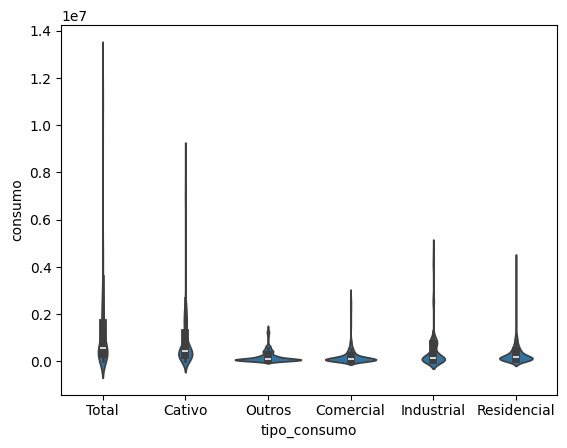

In [13]:
# Plot sobre o tipo de consumo, para identificar se existe alguma redundância nas informações
sns.violinplot(x=df_consumo['tipo_consumo'], y=df_consumo['consumo'])

As colunas Total e Cativo se diferem significativamente das demais informações de consumo

Entendendo melhor o que seria o consumo cativo:
 - O consumidor cativo de energia é aquele que não tem a opção de escolher seu próprio fornecedor de energia. Ele paga uma fatura todo mês à concessionária local de energia e está sujeito às tarifas reguladas pelo governo. Fonte: https://srna.co/consumidor-cativo-e-consumidor-livre-entenda-as-diferencas/

Desta maneira, os valores Total e Cativo representam informações diferentes a respeito do consumo, que seria o MODO (Cativo + Livre = Total), não o tipo de consumo em si. O dataset em dois dataframes para realizar a EDA.


In [14]:
# Filtrando os dados de interesse
df_livre_cativo = df_consumo[df_consumo['tipo_consumo'].isin(['Total', 'Cativo'])].drop(columns=['numero_consumidores'])
df_livre_cativo.head()



,ano,mes,tipo_consumo,consumo,sigla,estado,regiao,pais
0,2004,1,Total,65876,TO,Tocantins,Norte,Brasil
1,2004,1,Total,1444451,BA,Bahia,Nordeste,Brasil
2,2004,1,Total,1596274,PR,Paraná,Sul,Brasil
3,2004,1,Total,1780912,RS,Rio Grande do Sul,Sul,Brasil
4,2004,1,Total,630624,GO,Goiás,Centro-Oeste,Brasil


In [15]:
df_livre_cativo.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12960 entries, 0 to 37583
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   ano           12960 non-null  int64 
 1   mes           12960 non-null  int64 
 2   tipo_consumo  12960 non-null  object
 3   consumo       12960 non-null  int64 
 4   sigla         12960 non-null  object
 5   estado        12960 non-null  object
 6   regiao        12960 non-null  object
 7   pais          12960 non-null  object
dtypes: int64(3), object(5)
memory usage: 911.2+ KB


In [16]:
df_livre_cativo['consumo'].astype(float)

0          65876.0
1        1444451.0
2        1596274.0
3        1780912.0
4         630624.0
           ...    
37579     503565.0
37580     732101.0
37581     112337.0
37582     887204.0
37583    2170588.0
Name: consumo, Length: 12960, dtype: float64

In [17]:
# Cria a tabela pivot, com 'tipo_consumo' como colunas
df_pivot = df_livre_cativo.pivot_table(
    index=['ano', 'mes', 'estado','regiao'], 
    columns='tipo_consumo', 
    values='consumo', 
    aggfunc='mean'  # Calcula a média em caso de duplicatas
)

# Reseta o índice para tornar o DataFrame mais limpo
df_pivot = df_pivot.reset_index()

# Calcula o consumo livre (Livre = Total - Cativo)
df_pivot['Livre'] = df_pivot['Total'] - df_pivot['Cativo']

# Remove a coluna 'Total', já que não será mais usada
df_pivot = df_pivot.drop(columns=['Total'])

# Converte as colunas de volta para o formato longo (melt)
df_livre_cativo = pd.melt(
    df_pivot, 
    id_vars=['ano', 'mes', 'estado','regiao'],  # Colunas a serem mantidas
    var_name='tipo_consumo',           # Nome para as colunas derretidas
    value_name='consumo'               # Nome para os valores
)

# Exibe o DataFrame resultante
df_livre_cativo.head()


,ano,mes,estado,regiao,tipo_consumo,consumo
0,2004,1,Acre,Norte,Cativo,34840.0
1,2004,1,Alagoas,Nordeste,Cativo,285489.0
2,2004,1,Amapá,Norte,Cativo,43084.0
3,2004,1,Amazonas,Norte,Cativo,274773.0
4,2004,1,Bahia,Nordeste,Cativo,1356735.0


In [18]:
# Encontrar as linhas que não são 'Total' nem 'Cativo' na coluna 'tipo_consumo'
indices_para_remover = df_consumo[df_consumo['tipo_consumo'].isin(['Total', 'Cativo'])].index

# Remover essas linhas
df_consumo.drop(indices_para_remover, inplace=True)


In [19]:
df_consumo.info()

<class 'pandas.core.frame.DataFrame'>
Index: 26937 entries, 648 to 39896
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ano                  26937 non-null  int64  
 1   mes                  26937 non-null  int64  
 2   tipo_consumo         26937 non-null  object 
 3   numero_consumidores  26937 non-null  float64
 4   consumo              26937 non-null  int64  
 5   sigla                26937 non-null  object 
 6   estado               26937 non-null  object 
 7   regiao               26937 non-null  object 
 8   pais                 26937 non-null  object 
dtypes: float64(1), int64(3), object(5)
memory usage: 2.1+ MB


In [20]:
df_consumo[df_consumo['numero_consumidores'].isna()]

,ano,mes,tipo_consumo,numero_consumidores,consumo,sigla,estado,regiao,pais


Os dados nulos foram removidos ao retirar os dados da coluna tipo_consumo de valor Total e Cativo.

In [21]:
# taxa de consumo por consumidor
df_consumo['consumo_por_consumidor'] = df_consumo['consumo']/df_consumo['numero_consumidores']

<Axes: xlabel='tipo_consumo', ylabel='consumo'>

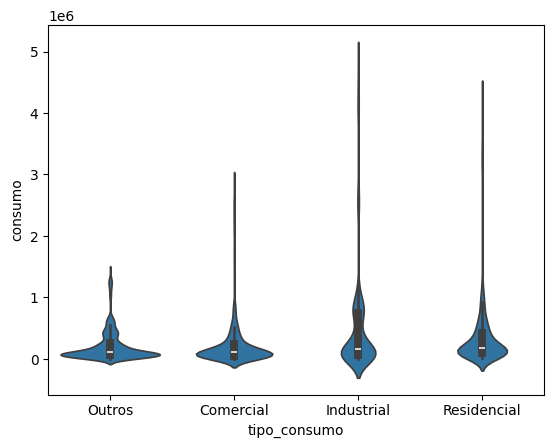

In [22]:
# plot
sns.violinplot(x=df_consumo['tipo_consumo'], y=df_consumo['consumo'])

## EDA

### Análise do cenário livre x cativo ao longo do tempo

In [23]:
df_livre_cativo.describe()

,ano,mes,consumo
count,12960.000000,12960.000000,1.296000e+04
mean,2013.500000,6.500000,6.783421e+05
std,5.766504,3.452186,1.161003e+06
min,2004.000000,1.000000,-1.000000e+00
25%,2008.750000,3.750000,7.437575e+04
50%,2013.500000,6.500000,2.922570e+05
75%,2018.250000,9.250000,7.125635e+05
max,2023.000000,12.000000,8.784265e+06


In [24]:
# Adiciona a coluna 'day' com valor fixo de 1
df_livre_cativo['day'] = 1

# Converte as colunas 'ano' e 'mes' para inteiro, se necessário
df_livre_cativo['ano'] = df_livre_cativo['ano'].astype(int)
df_livre_cativo['mes'] = df_livre_cativo['mes'].astype(int)
df_livre_cativo['consumo'] = pd.to_numeric(df_livre_cativo['consumo'])

# Cria a coluna 'data' a partir das colunas 'ano', 'mes' e 'day'
df_livre_cativo['data'] = pd.to_datetime(
    df_livre_cativo[['ano', 'mes', 'day']].astype(str).agg('-'.join, axis=1), 
    format='%Y-%m-%d'  # Formato ano-mês-dia
)

# Ordena os dados pela coluna 'data'
df_livre_cativo = df_livre_cativo.sort_values(by='data')

# Exibe as primeiras linhas para verificar
df_livre_cativo.head()


,ano,mes,estado,regiao,tipo_consumo,consumo,day,data
0,2004,1,Acre,Norte,Cativo,34840.0,1,2004-01-01
6482,2004,1,Amapá,Norte,Livre,0.0,1,2004-01-01
6483,2004,1,Amazonas,Norte,Livre,0.0,1,2004-01-01
6484,2004,1,Bahia,Nordeste,Livre,87716.0,1,2004-01-01
6485,2004,1,Ceará,Nordeste,Livre,0.0,1,2004-01-01


In [25]:
df_livre_cativo.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12960 entries, 0 to 12959
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   ano           12960 non-null  int64         
 1   mes           12960 non-null  int64         
 2   estado        12960 non-null  object        
 3   regiao        12960 non-null  object        
 4   tipo_consumo  12960 non-null  object        
 5   consumo       12960 non-null  float64       
 6   day           12960 non-null  int64         
 7   data          12960 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(1), int64(3), object(3)
memory usage: 911.2+ KB


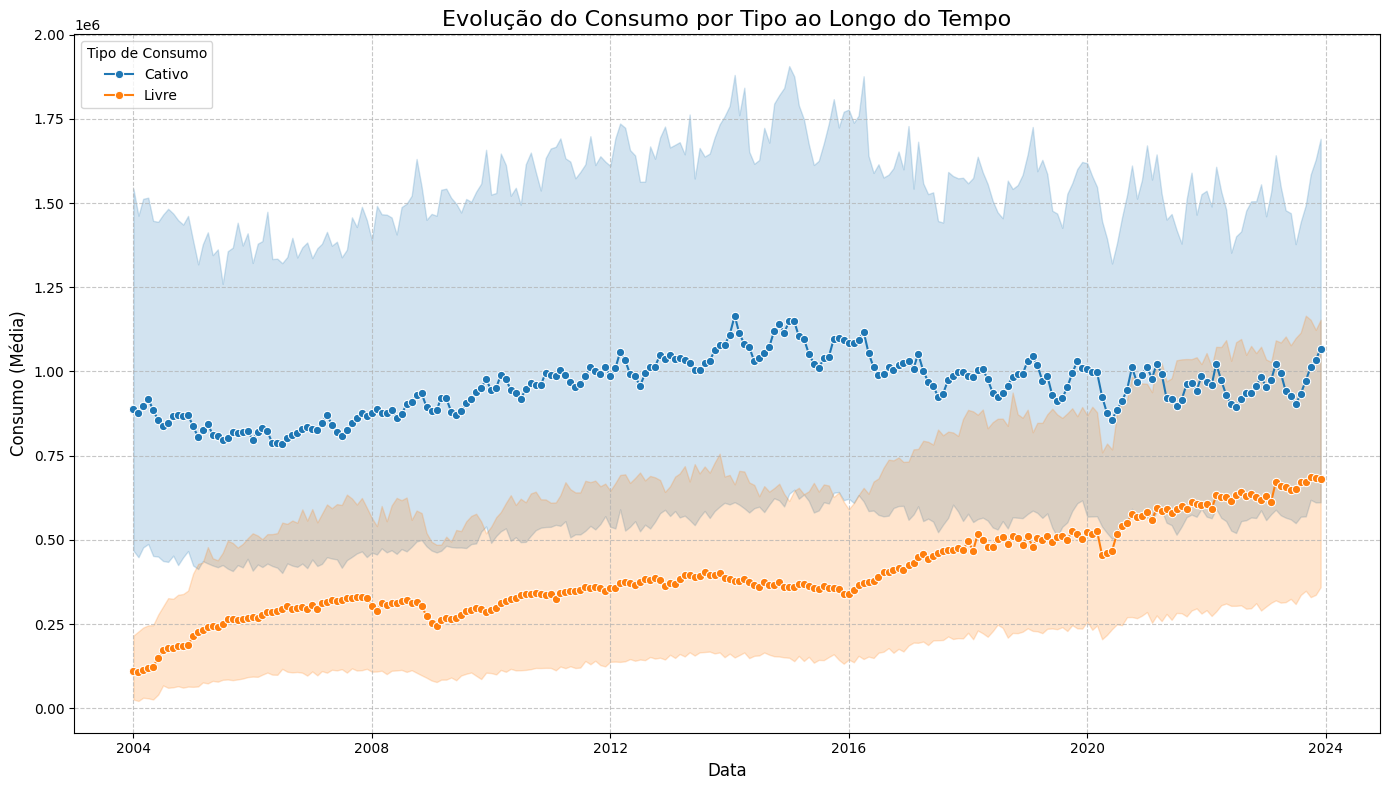

In [26]:
# Criar o gráfico de evolução ao longo do tempo
plt.figure(figsize=(14, 8))
sns.lineplot(
    data=df_livre_cativo,
    x='data',         # Eixo X será a data
    y='consumo',      # Eixo Y será o consumo
    hue='tipo_consumo',  # Diferencia pelo tipo de consumo
    marker='o'          # Adiciona marcadores para destacar os pontos
)

# Personalização do gráfico
plt.title('Evolução do Consumo por Tipo ao Longo do Tempo', fontsize=16)
plt.xlabel('Data', fontsize=12)
plt.ylabel('Consumo (Média)', fontsize=12)
plt.legend(title='Tipo de Consumo', loc='upper left', fontsize=10)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()

# Exibe o gráfico
plt.show()

# Oportunidade de entender se este comportantemento está em todo o país ou em algum estado específico.

O tipo de consumo livre está em tendência de alta, e o consumo cativo está em tendência de queda desde 2015.

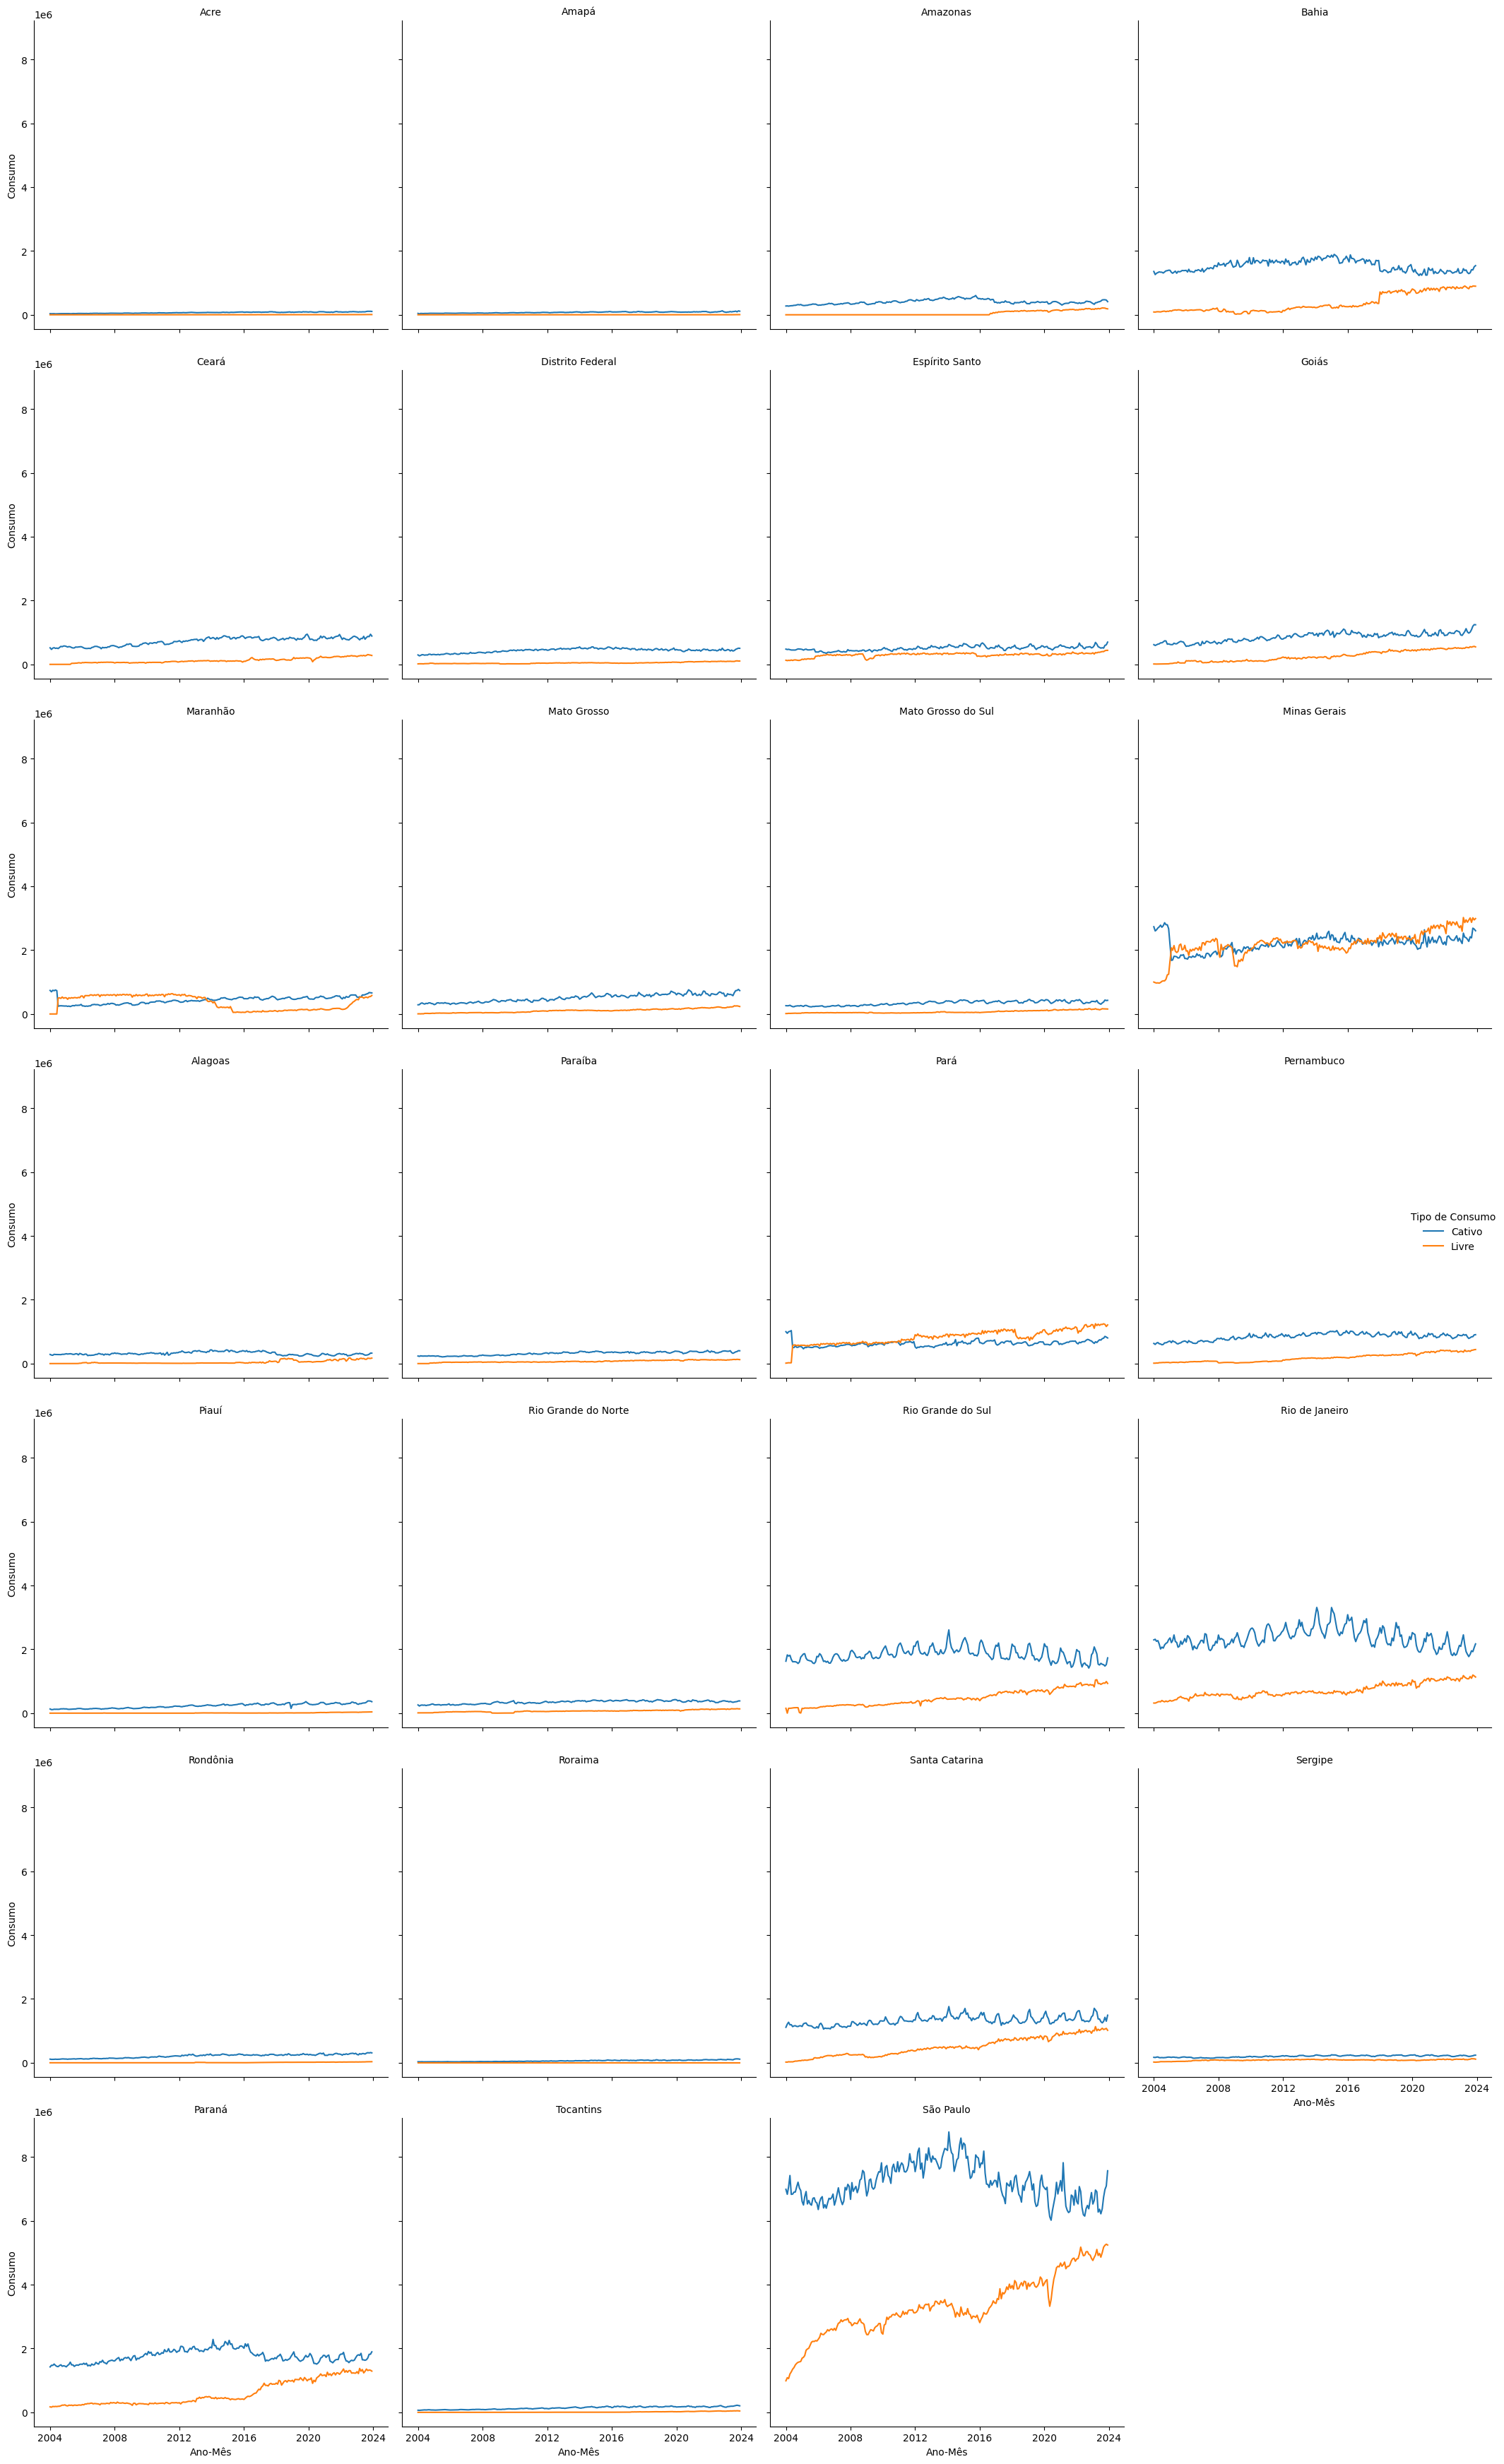

In [27]:
# Usando o FacetGrid para criar subgráficos por região
g = sns.FacetGrid(df_livre_cativo, col='estado', hue='tipo_consumo', height=5, col_wrap=4)

# Aplicando o gráfico de linha dentro de cada facet
g.map(sns.lineplot, 'data', 'consumo')

# Ajustando a legenda e o título
g.add_legend(title='Tipo de Consumo')
g.set_axis_labels('Ano-Mês', 'Consumo')

# Título para o grid
g.set_titles('{col_name}')

# Exibindo o gráfico
plt.tight_layout()
plt.show()

- Tendência de queda do consumo cativo nos estados: Bahia, Paraná e São Paulo.
- Tendência de aumento do consumo livre nos estados: Santa Catarina, Rio de Janeiro, Rio Grande do Sul, Pernambuco, Pará, Minas Gerais, Bahioa, Paraná e São Paulo (mais acentuadamente)


### Análise geral de consumo dos consumidores

In [28]:
df_consumo.sample(5)

,ano,mes,tipo_consumo,numero_consumidores,consumo,sigla,estado,regiao,pais,consumo_por_consumidor
7763,2007,12,Residencial,77690.0,17072,RR,Roraima,Norte,Brasil,0.219745
19153,2013,2,Residencial,3478253.0,665088,RS,Rio Grande do Sul,Sul,Brasil,0.191213
13096,2010,6,Industrial,12243.0,399127,ES,Espírito Santo,Sudeste,Brasil,32.600425
11091,2009,3,Industrial,401.0,1415,RR,Roraima,Norte,Brasil,3.528678
30562,2019,4,Industrial,14315.0,784413,BA,Bahia,Nordeste,Brasil,54.796577


In [29]:
print(df_consumo.nunique())

ano                          20
mes                          12
tipo_consumo                  4
numero_consumidores       23851
consumo                   25148
sigla                        27
estado                       27
regiao                        5
pais                          1
consumo_por_consumidor    25903
dtype: int64


In [30]:
df_consumo.info()

<class 'pandas.core.frame.DataFrame'>
Index: 26937 entries, 648 to 39896
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   ano                     26937 non-null  int64  
 1   mes                     26937 non-null  int64  
 2   tipo_consumo            26937 non-null  object 
 3   numero_consumidores     26937 non-null  float64
 4   consumo                 26937 non-null  int64  
 5   sigla                   26937 non-null  object 
 6   estado                  26937 non-null  object 
 7   regiao                  26937 non-null  object 
 8   pais                    26937 non-null  object 
 9   consumo_por_consumidor  26937 non-null  float64
dtypes: float64(2), int64(3), object(5)
memory usage: 2.3+ MB


In [31]:
df_consumo.describe()

,ano,mes,numero_consumidores,consumo,consumo_por_consumidor
count,26937.00000,26937.000000,2.693700e+04,2.693700e+04,26937.000000
mean,2013.85867,6.508520,6.954567e+05,3.434690e+05,10.207456
std,5.93925,3.455573,1.869920e+06,6.090196e+05,28.029498
min,2004.00000,1.000000,5.200000e+01,3.540000e+02,0.062365
25%,2009.00000,4.000000,1.874100e+04,6.218800e+04,0.319320
50%,2014.00000,7.000000,1.084390e+05,1.392380e+05,1.028371
75%,2019.00000,10.000000,4.581500e+05,3.705280e+05,5.173810
max,2023.00000,12.000000,1.920126e+07,4.849895e+06,299.373915


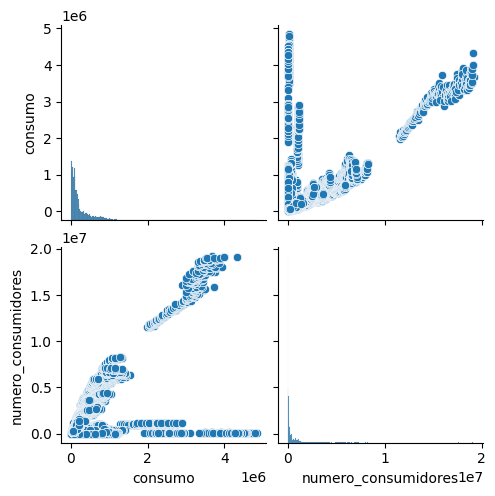

In [32]:
# Como estão distribuídas as variáveis de consumo e número de consumidores? Qual a correlação das variáveis?
sns.pairplot(df_consumo[['consumo','numero_consumidores']])

- Distribuição do consumo possui grande frequência amostral em 1e7
- Distribução dos consumidores possui uma frequência amostral distribuída confirmado pelo desvio padrão elevado
- A correlção entre consumo e número de consumidores aparenta, de certa maneira, alguma correlação linear. Porém, existem dados que fogem desta correlação, provavelmente por alguma categorização do tipo de consumo ou região.

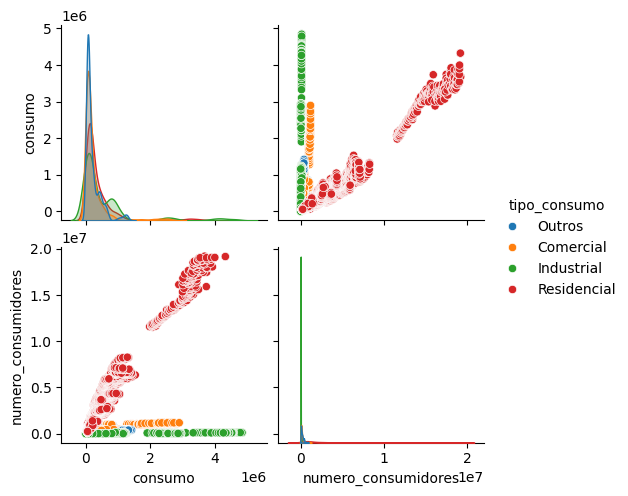

In [33]:
# Existem padrões de tipo de consumo?

sns.pairplot(df_consumo[['consumo','numero_consumidores','tipo_consumo']],hue='tipo_consumo')

Filtrando por tipo de consumo, é notável a correlação entre o número de consumidores e consumo para o tipo de consumo residencial.

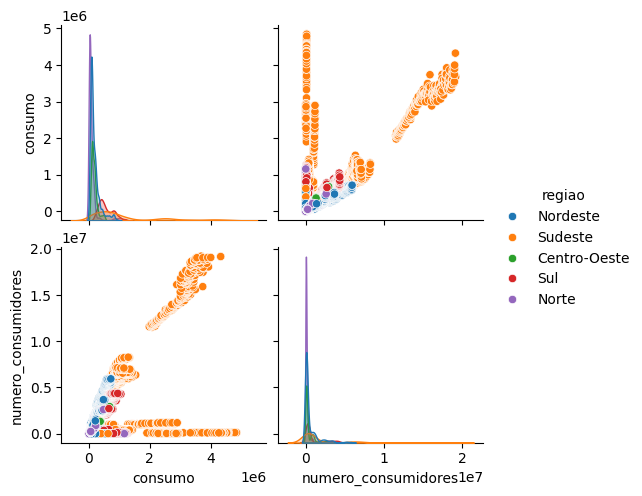

In [34]:
# Existem padrões de regiao?
sns.pairplot(df_consumo[['consumo','numero_consumidores','regiao']],hue='regiao')

Filtrando por região:
- As regiões Nordeste, Norte e Centro-Oeste possui uma mediana de consumo inferior a regiao sul e sudeste.
- A região sudeste apresenta um padrão comportamental muito diferente das demais, no que se diz respeito a distribuição e a correlação entre consumo e número de consumidores.

In [35]:
# Para evitar dados duplicados, eles serão agrupados de acordo com as variáveis categóricas, pela média
df_group = df_consumo[['regiao','estado','ano','mes','consumo','numero_consumidores','consumo_por_consumidor','tipo_consumo']].groupby(['regiao','estado','tipo_consumo','ano','mes']).mean()
df_group.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 25920 entries, ('Centro-Oeste', 'Distrito Federal', 'Comercial', np.int64(2004), np.int64(1)) to ('Sul', 'Santa Catarina', 'Residencial', np.int64(2023), np.int64(12))
Data columns (total 3 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   consumo                 25920 non-null  float64
 1   numero_consumidores     25920 non-null  float64
 2   consumo_por_consumidor  25920 non-null  float64
dtypes: float64(3)
memory usage: 734.8+ KB


In [36]:
df_reset_index=df_group.reset_index()
df_reset_index.sample(10)

,regiao,estado,tipo_consumo,ano,mes,consumo,numero_consumidores,consumo_por_consumidor
6014,Nordeste,Ceará,Industrial,2005,3,161465.0,6768.0,23.857122
12315,Nordeste,Sergipe,Residencial,2010,4,73432.0,610312.0,0.120319
5759,Nordeste,Bahia,Residencial,2023,12,718461.0,5932740.0,0.121101
19444,Sudeste,Espírito Santo,Industrial,2004,5,323523.0,11459.0,28.233092
13324,Norte,Acre,Residencial,2014,5,33837.0,186615.0,0.181320
13562,Norte,Amapá,Comercial,2014,3,18003.0,16754.0,1.074549
21249,Sudeste,Rio de Janeiro,Comercial,2014,10,910775.0,480391.0,1.895904
23926,Sul,Paraná,Residencial,2017,11,604252.0,3794967.0,0.159225
25480,Sul,Santa Catarina,Outros,2007,5,229535.0,240331.0,0.955079
10535,Nordeste,Piauí,Residencial,2021,12,178417.0,1132019.0,0.157610


### Analise geográfica

#### Agrupamento

In [37]:
# Configurando os dados e ordenando pela coluna 'consumo'
df_sorted = df_group.sort_values(by='consumo', ascending=False)

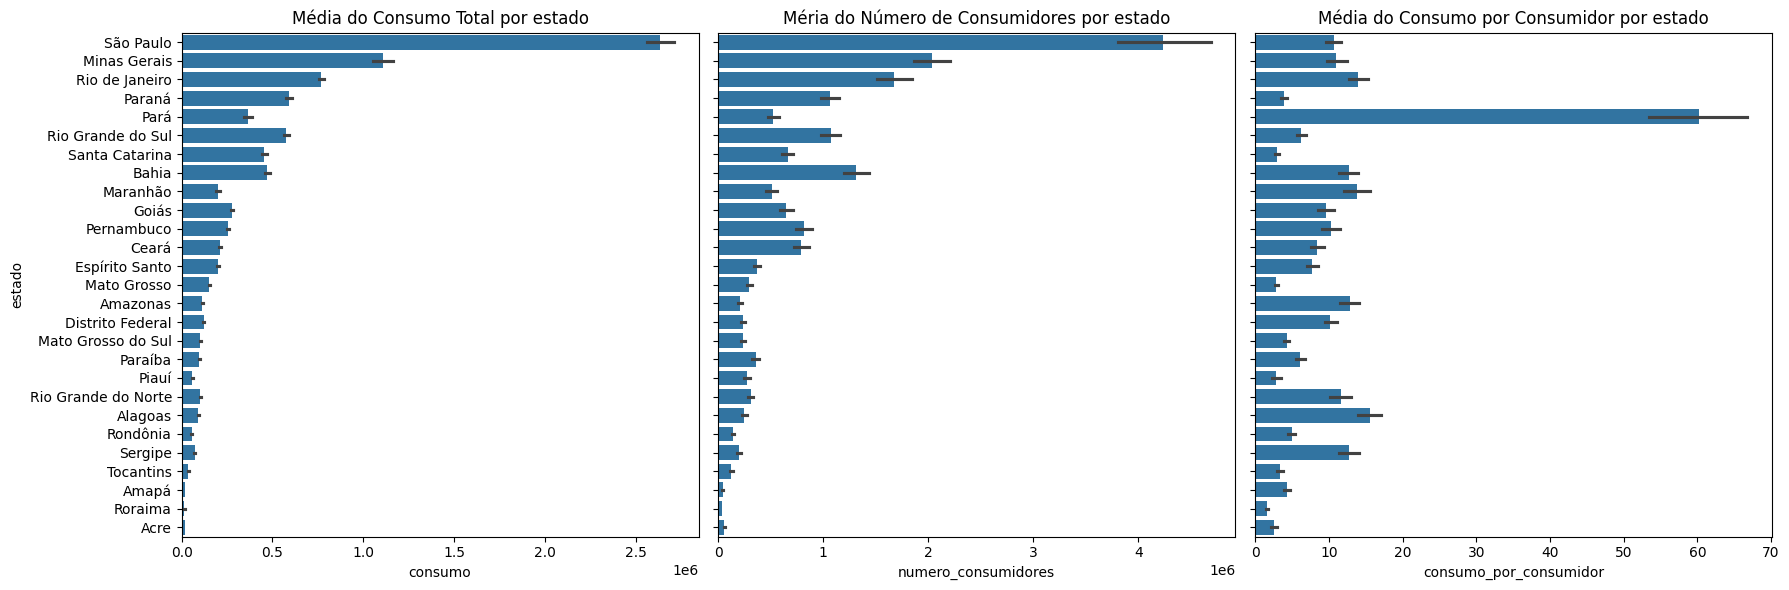

In [38]:
# Criando a figura e os subplots
fig, axes = plt.subplots(1, 3, figsize=(18, 6), sharey=True)  # 1 linha, 3 colunas

# Gráfico 1: Consumo total
sns.barplot(data=df_sorted, y='estado', x='consumo', orient='h', ax=axes[0])
axes[0].set_title('Média do Consumo Total por estado')

# Gráfico 2: Consumo médio
sns.barplot(data=df_sorted, y='estado', x='numero_consumidores', orient='h', ax=axes[1])
axes[1].set_title('Méria do Número de Consumidores por estado')

# Gráfico 3: Consumo por habitante
sns.barplot(data=df_sorted, y='estado', x='consumo_por_consumidor', orient='h', ax=axes[2])
axes[2].set_title('Média do Consumo por Consumidor por estado')

# Ajustando os layouts
plt.tight_layout()
plt.show()

São Paulo e Minas Gerais são os estados com maior consumo e número de consumidores. Porém, a média de consumo por consumidor é muito inferior em relação às demais.

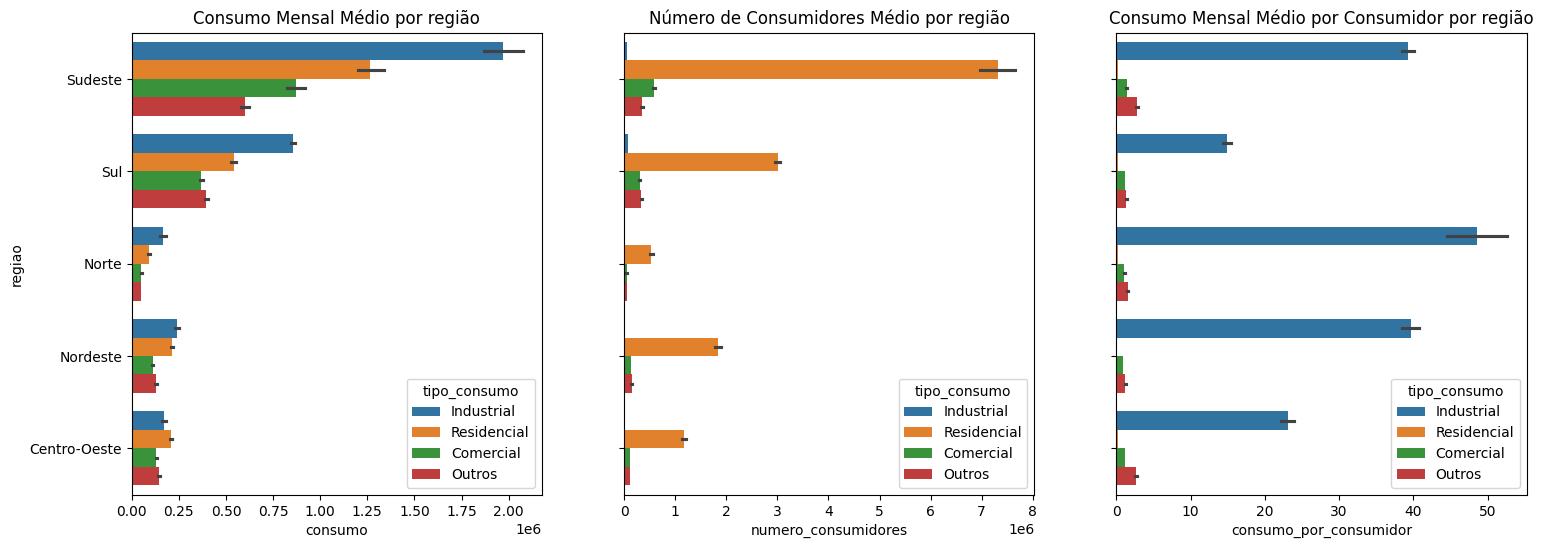

In [39]:
# Criando a figura e os subplots
fig, axes = plt.subplots(1, 3, figsize=(18, 6), sharey=True)  # 1 linha, 3 colunas

# Gráfico 1: Consumo Total (com hue)
sns.barplot(data=df_sorted, y='regiao', x='consumo', orient='h', ax=axes[0], hue='tipo_consumo')
axes[0].set_title('Consumo Mensal Médio por região')

# Gráfico 2: Número de Consumidores (com hue)
sns.barplot(data=df_sorted, y='regiao', x='numero_consumidores', orient='h', ax=axes[1], hue='tipo_consumo')
axes[1].set_title('Número de Consumidores Médio por região')

# Gráfico 3: Consumo por Consumidor (com hue)
sns.barplot(data=df_sorted, y='regiao', x='consumo_por_consumidor', orient='h', ax=axes[2], hue='tipo_consumo')
axes[2].set_title('Consumo Mensal Médio por Consumidor por região')

# Exibindo o gráfico
plt.show()


Principalmente a região norte possui um grande consumo por consumidor devido ao tipo de consumo industrial, que embora seja significativamente inferior ao consumo da região sudeste, é elevada se comparado de forma percapta.

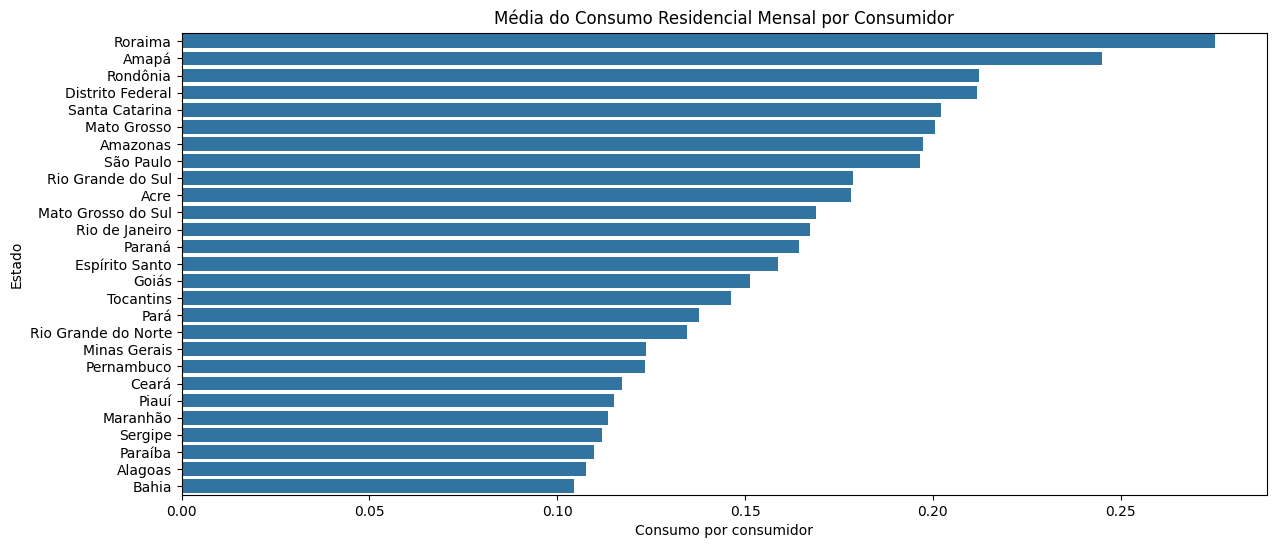

In [40]:
# Configura o gráfico
plt.figure(figsize=(14, 6))  # Define o tamanho da figura

# Filtra e agrupa os dados, calculando a média de consumo por estado
df_aggregated = df_reset_index[df_reset_index['tipo_consumo'] == 'Residencial'] \
    .groupby('estado')['consumo_por_consumidor'] \
    .mean() \
    .reset_index()  # Reinicia o índice após o groupby para manter um formato de DataFrame normal

# Ordena os estados pela média de consumo
df_aggregated = df_aggregated.sort_values(by='consumo_por_consumidor', ascending=False)

# Cria o gráfico de barras
sns.barplot(
    data=df_aggregated,
    x='consumo_por_consumidor',  # Consumo por consumidor
    y='estado',  # Estado
    orient='h'  # Orientação horizontal
)

# Ajusta os rótulos e o título
plt.title("Média do Consumo Residencial Mensal por Consumidor")
plt.xlabel("Consumo por consumidor")
plt.ylabel("Estado")
plt.show()


O consumo residencial mensal médio por consumidor, estados como Roraima, Amapá, Rondônia, Distrito Federal, Satanta Catarina, Mato Grosso e Amazonas se encontram com uma taxa de consumo maior em relação ao estado de São Paulo.

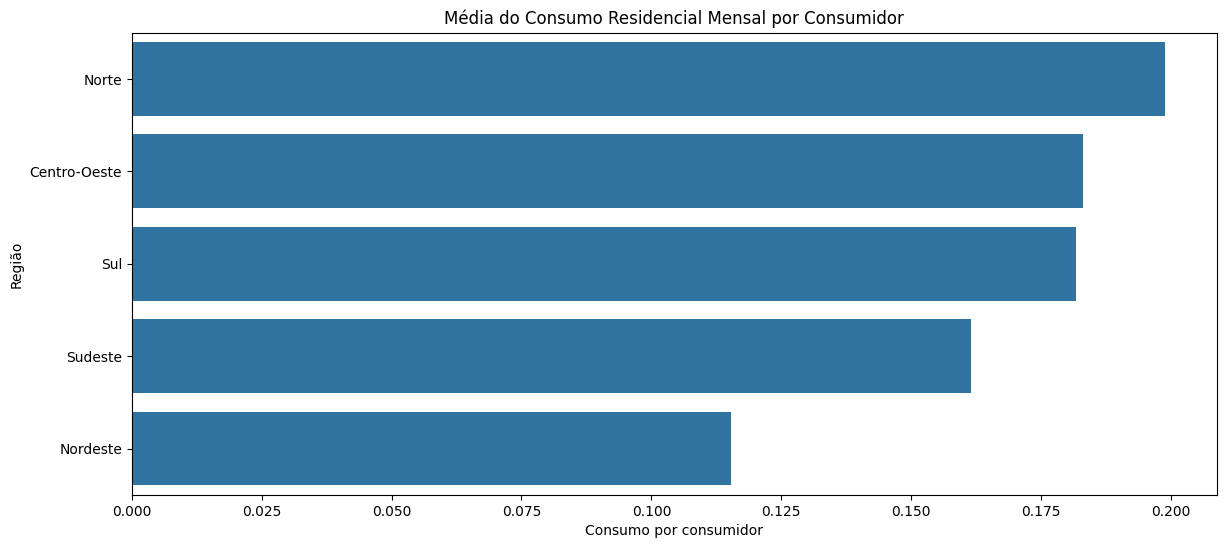

In [41]:
# Configura o gráfico
plt.figure(figsize=(14, 6))  # Define o tamanho da figura

# Filtra e agrupa os dados, calculando a média de consumo por estado
df_aggregated = df_reset_index[df_reset_index['tipo_consumo'] == 'Residencial'] \
    .groupby('regiao')['consumo_por_consumidor'] \
    .mean() \
    .reset_index()  # Reinicia o índice após o groupby para manter um formato de DataFrame normal

# Ordena os estados pela média de consumo
df_aggregated = df_aggregated.sort_values(by='consumo_por_consumidor', ascending=False)

# Cria o gráfico de barras
sns.barplot(
    data=df_aggregated,
    x='consumo_por_consumidor',  # Consumo por consumidor
    y='regiao',  # Estado
    orient='h'  # Orientação horizontal
)

# Ajusta os rótulos e o título
plt.title("Média do Consumo Residencial Mensal por Consumidor")
plt.xlabel("Consumo por consumidor")
plt.ylabel("Região")
plt.show()


A média de consumo residencial por consumidor das regiões Norte, Centro-Oeste e Sul são superiores a região sudeste.

### Análise temporal

#### Evolução do consumo

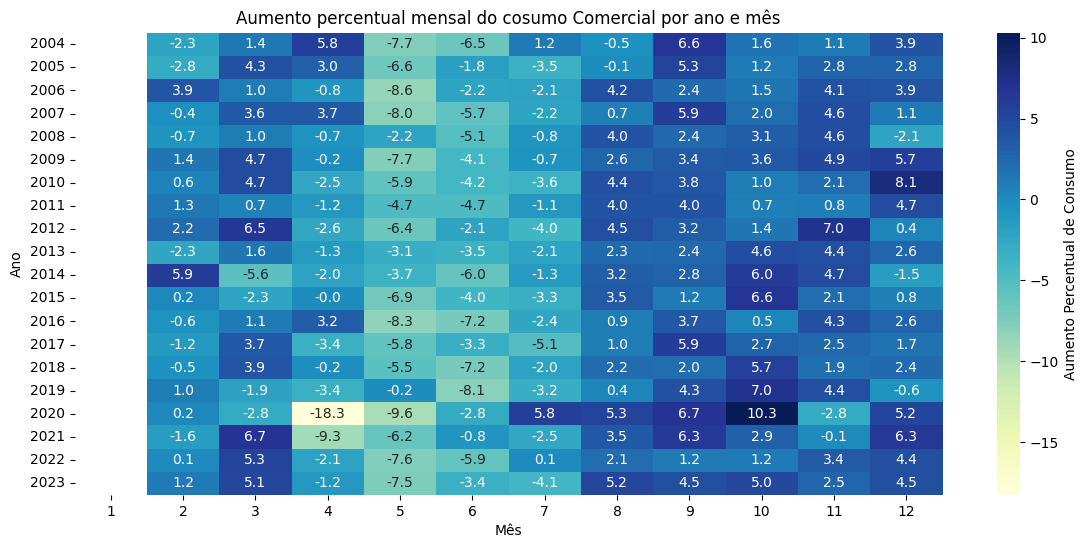

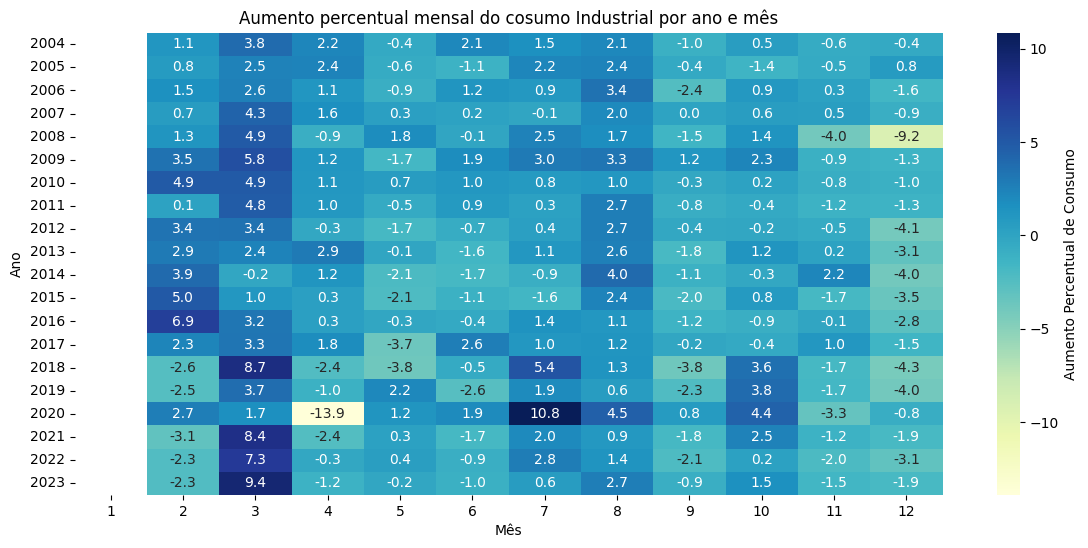

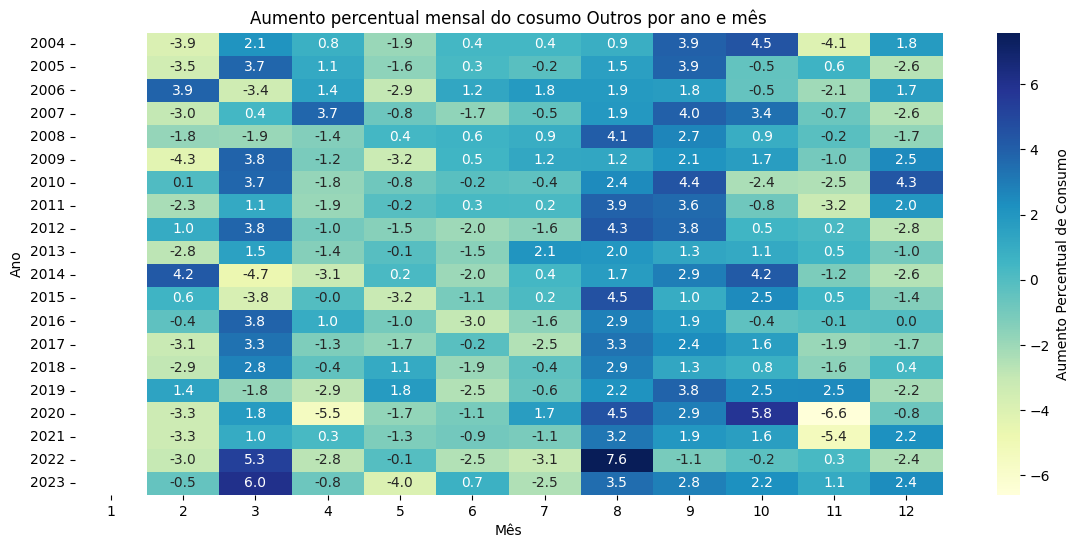

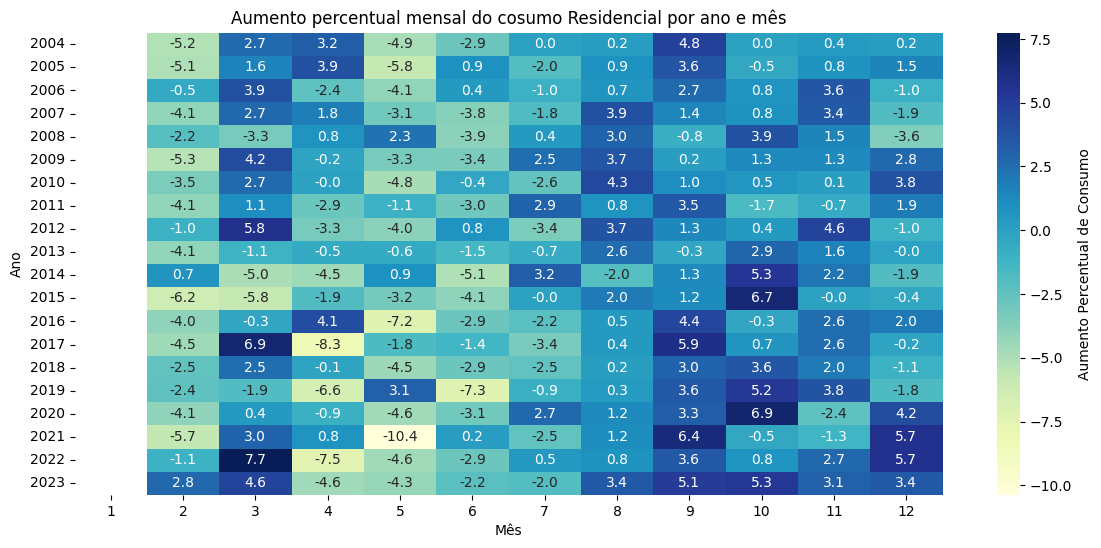

In [42]:
for tipo in df_reset_index['tipo_consumo'].unique():
    
    # Filtra os dados por tipo de consumo
    df_filtered = df_reset_index[df_reset_index['tipo_consumo'] == tipo].reset_index()

    df_reset_index_agg = df_filtered.groupby(['ano', 'mes'], as_index=False).agg({'consumo': 'mean'})  # Usa a média dos valores
    # Agora faz o pivot
    tabela_pivot = df_reset_index_agg.pivot(index='ano', columns='mes', values='consumo')
    # evolucao_percentual
    evolucao_percentual = tabela_pivot.pct_change(axis=1) * 100  # Multiplica por 100 para converter em porcentagem

    # Configura o heatmap
    plt.figure(figsize=(14, 6))  # Define o tamanho da figura
    sns.heatmap(
        evolucao_percentual, 
        annot=True,  # Mostra os valores nas células
        fmt=".1f",   # Formata os números com 1 casa decimal
        cmap="YlGnBu",  # Escolhe a escala de cores
        cbar_kws={'label': 'Aumento Percentual de Consumo'}  # Adiciona rótulo à barra de cores
    )

    # Ajusta os rótulos e o título
    plt.title(f"Aumento percentual mensal do cosumo {tipo} por ano e mês")
    plt.xlabel("Mês")
    plt.ylabel("Ano")
    plt.show()

- O consumo residencial e comercial aumenta significativamente nos últimos 4 meses do ano.
- O consumo industrial aparenta um aumento significativo no mês de março.
- O consumo outros aparenta um aumetno significativo no mês de agosto.

##### Distribuição dos dados

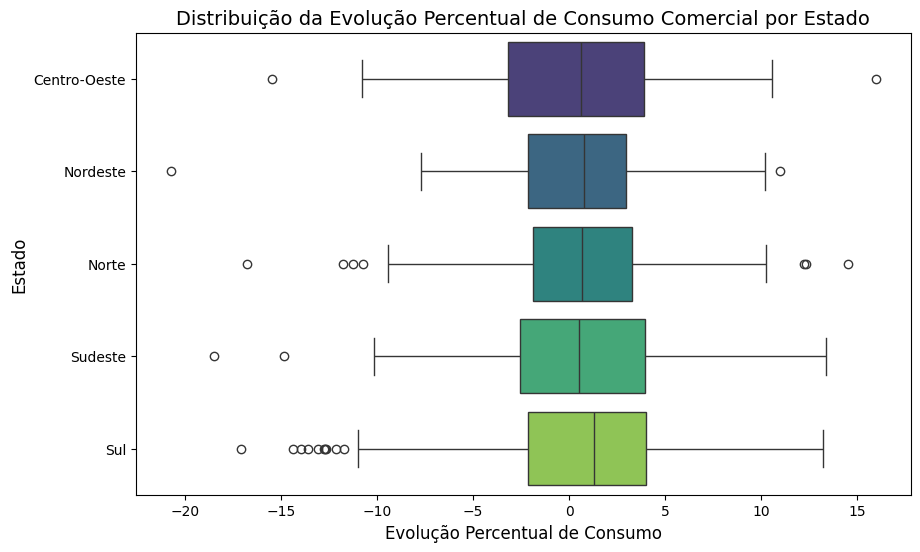

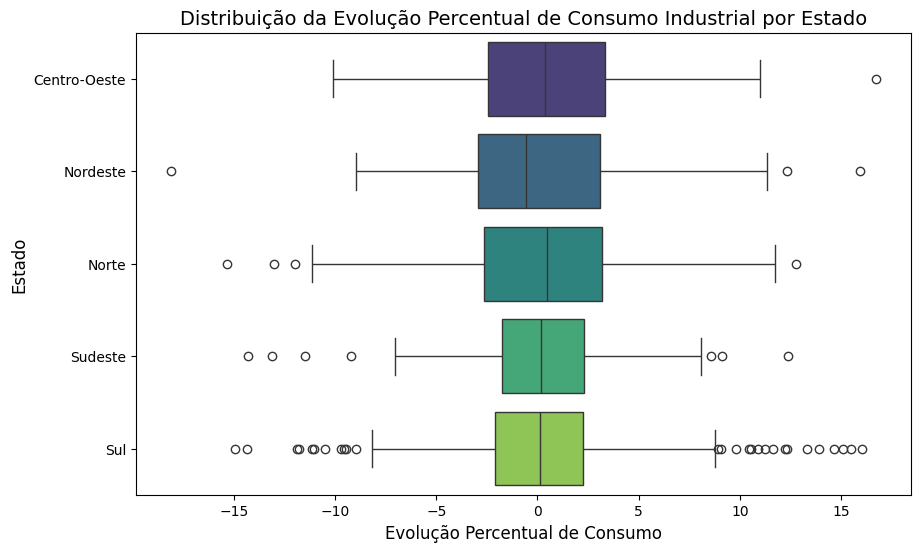

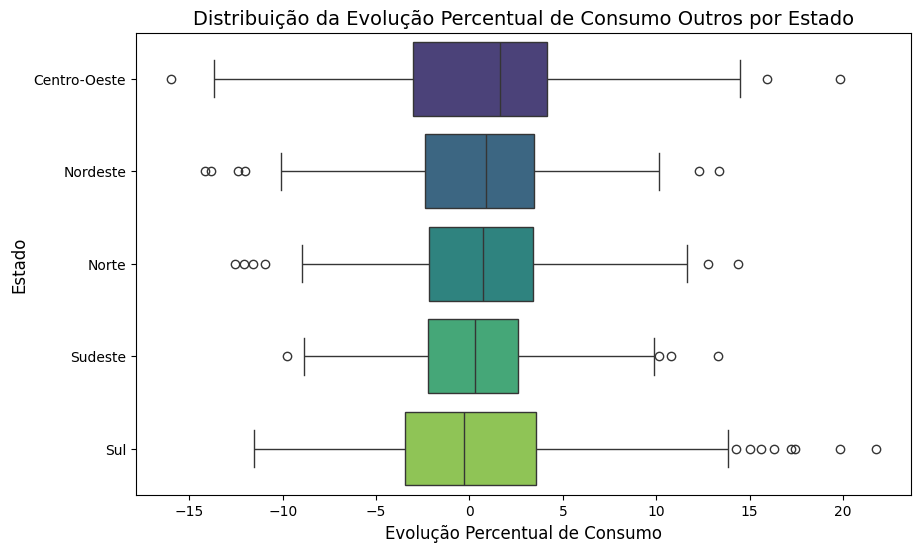

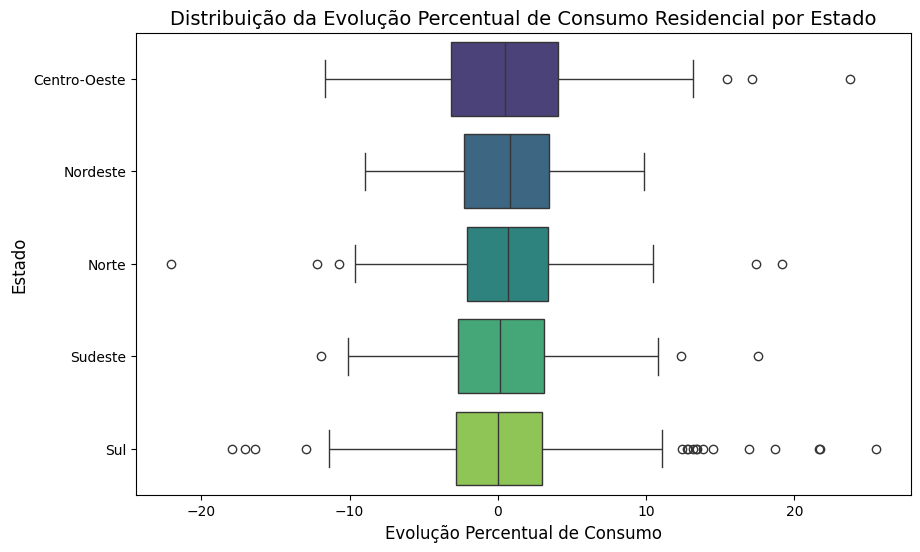

In [43]:
# Loop para processar os diferentes tipos de consumo
for tipo in df_reset_index['tipo_consumo'].unique():
    # Passo 1: Filtra os dados para o tipo de consumo atual
    df_filtered = df_reset_index[df_reset_index['tipo_consumo'] == tipo]

    # Passo 2: Agrupar os dados por ano, mês e regiao
    df_reset_index_agg = df_filtered.groupby(['ano', 'mes', 'regiao'], as_index=False).agg({'consumo': 'mean'})

    # Passo 3: Criar a tabela pivot para reorganizar os dados com os estados como colunas
    tabela_pivot = df_reset_index_agg.pivot(index=['ano', 'mes'], columns='regiao', values='consumo')

    # Passo 4: Calcular a evolução percentual por regiao (pct_change entre os meses)
    evolucao_percentual = tabela_pivot.pct_change(axis=0) * 100  # Multiplica por 100 para converter em porcentagem

    # Passo 5: Criar o boxplot
    plt.figure(figsize=(10, 6))
    
    # Transformar os dados para o formato necessário para o boxplot
    evolucao_percentual_reset = evolucao_percentual.reset_index()
    
    # Criar o gráfico
    sns.boxplot(data=evolucao_percentual_reset.drop(columns=['ano', 'mes']), orient='h', palette='viridis')

    # Personalização
    plt.title(f'Distribuição da Evolução Percentual de Consumo {tipo} por Estado', fontsize=14)
    plt.xlabel('Evolução Percentual de Consumo', fontsize=12)
    plt.ylabel('Estado', fontsize=12)

    # Exibindo o gráfico
    plt.show()


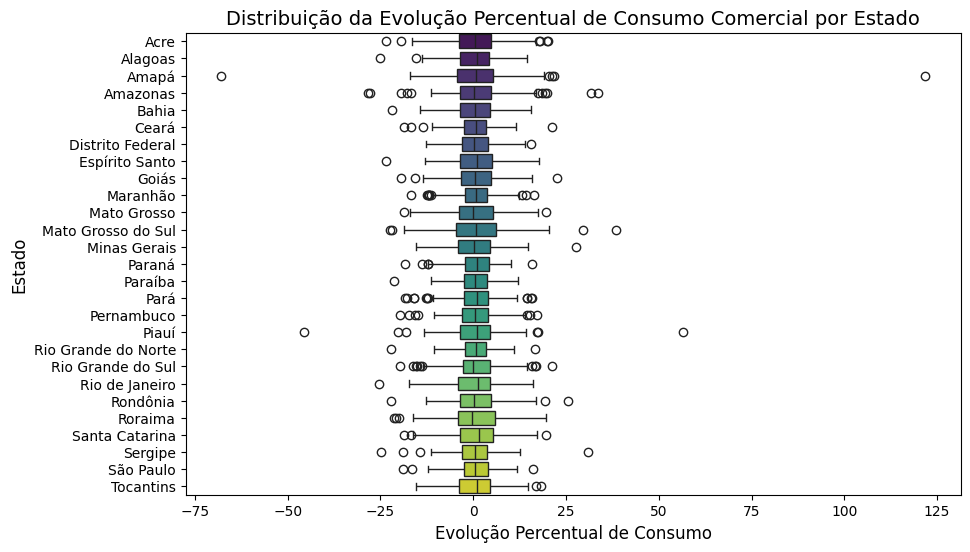

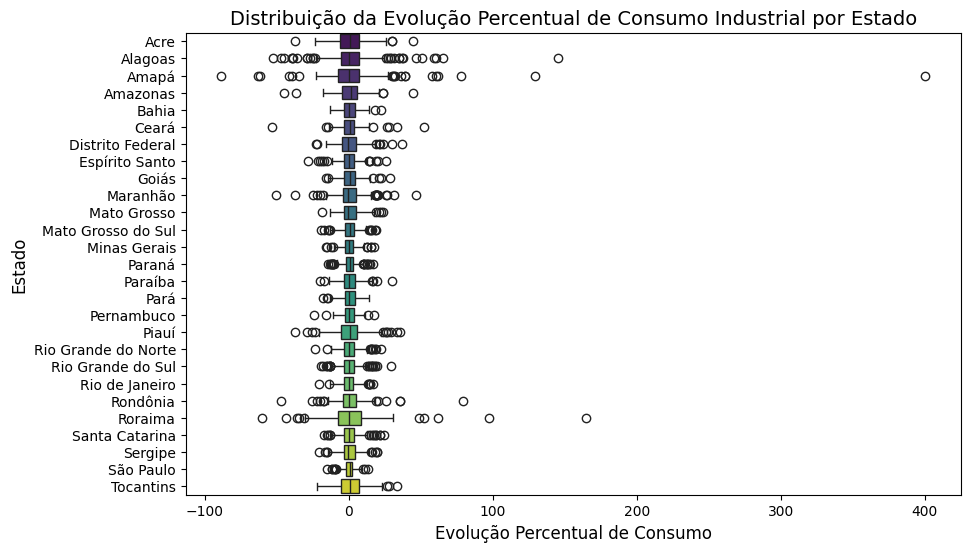

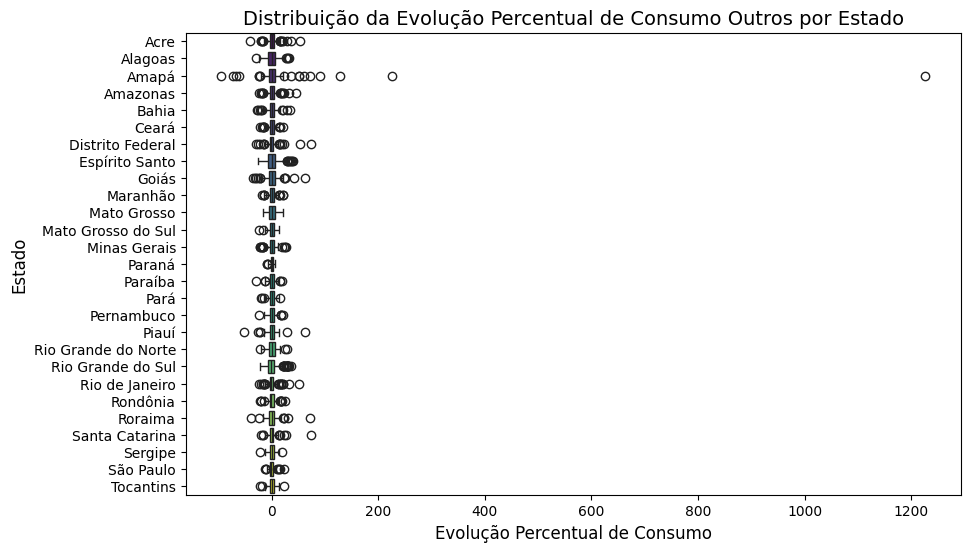

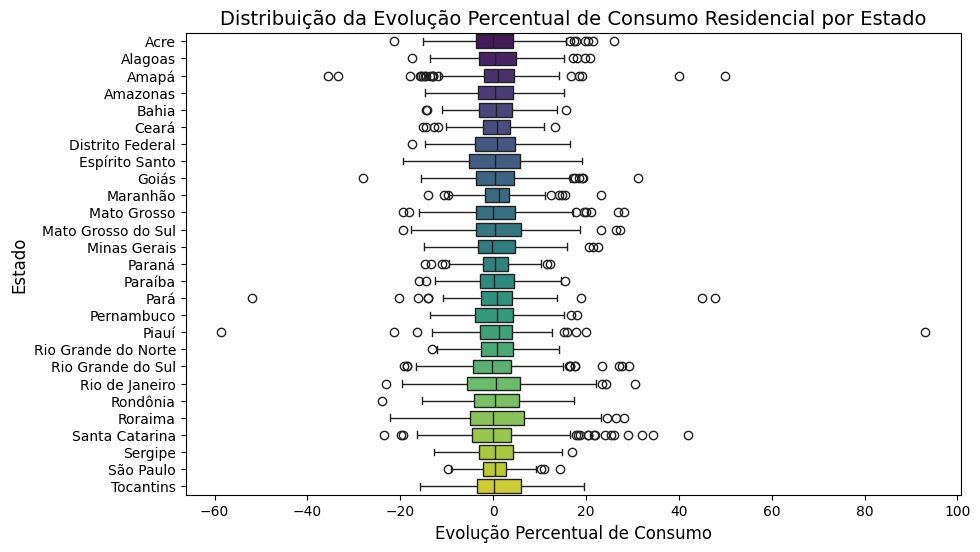

In [44]:
# Loop para processar os diferentes tipos de consumo
for tipo in df_reset_index['tipo_consumo'].unique():
    # Passo 1: Filtra os dados para o tipo de consumo atual
    df_filtered = df_reset_index[df_reset_index['tipo_consumo'] == tipo]

    # Passo 2: Agrupar os dados por ano, mês e estado
    df_reset_index_agg = df_filtered.groupby(['ano', 'mes', 'estado'], as_index=False).agg({'consumo': 'mean'})

    # Passo 3: Criar a tabela pivot para reorganizar os dados com os estados como colunas
    tabela_pivot = df_reset_index_agg.pivot(index=['ano', 'mes'], columns='estado', values='consumo')

    # Passo 4: Calcular a evolução percentual por estado (pct_change entre os meses)
    evolucao_percentual = tabela_pivot.pct_change(axis=0) * 100  # Multiplica por 100 para converter em porcentagem

    # Passo 5: Criar o boxplot
    plt.figure(figsize=(10, 6))
    
    # Transformar os dados para o formato necessário para o boxplot
    evolucao_percentual_reset = evolucao_percentual.reset_index()
    
    # Criar o gráfico
    sns.boxplot(data=evolucao_percentual_reset.drop(columns=['ano', 'mes']), orient='h', palette='viridis')

    # Personalização
    plt.title(f'Distribuição da Evolução Percentual de Consumo {tipo} por Estado', fontsize=14)
    plt.xlabel('Evolução Percentual de Consumo', fontsize=12)
    plt.ylabel('Estado', fontsize=12)

    # Exibindo o gráfico
    plt.show()


#### Evolução do consumo por região e tipo em 2023

In [45]:
df_reset_index.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25920 entries, 0 to 25919
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   regiao                  25920 non-null  object 
 1   estado                  25920 non-null  object 
 2   tipo_consumo            25920 non-null  object 
 3   ano                     25920 non-null  int64  
 4   mes                     25920 non-null  int64  
 5   consumo                 25920 non-null  float64
 6   numero_consumidores     25920 non-null  float64
 7   consumo_por_consumidor  25920 non-null  float64
dtypes: float64(3), int64(2), object(3)
memory usage: 1.6+ MB


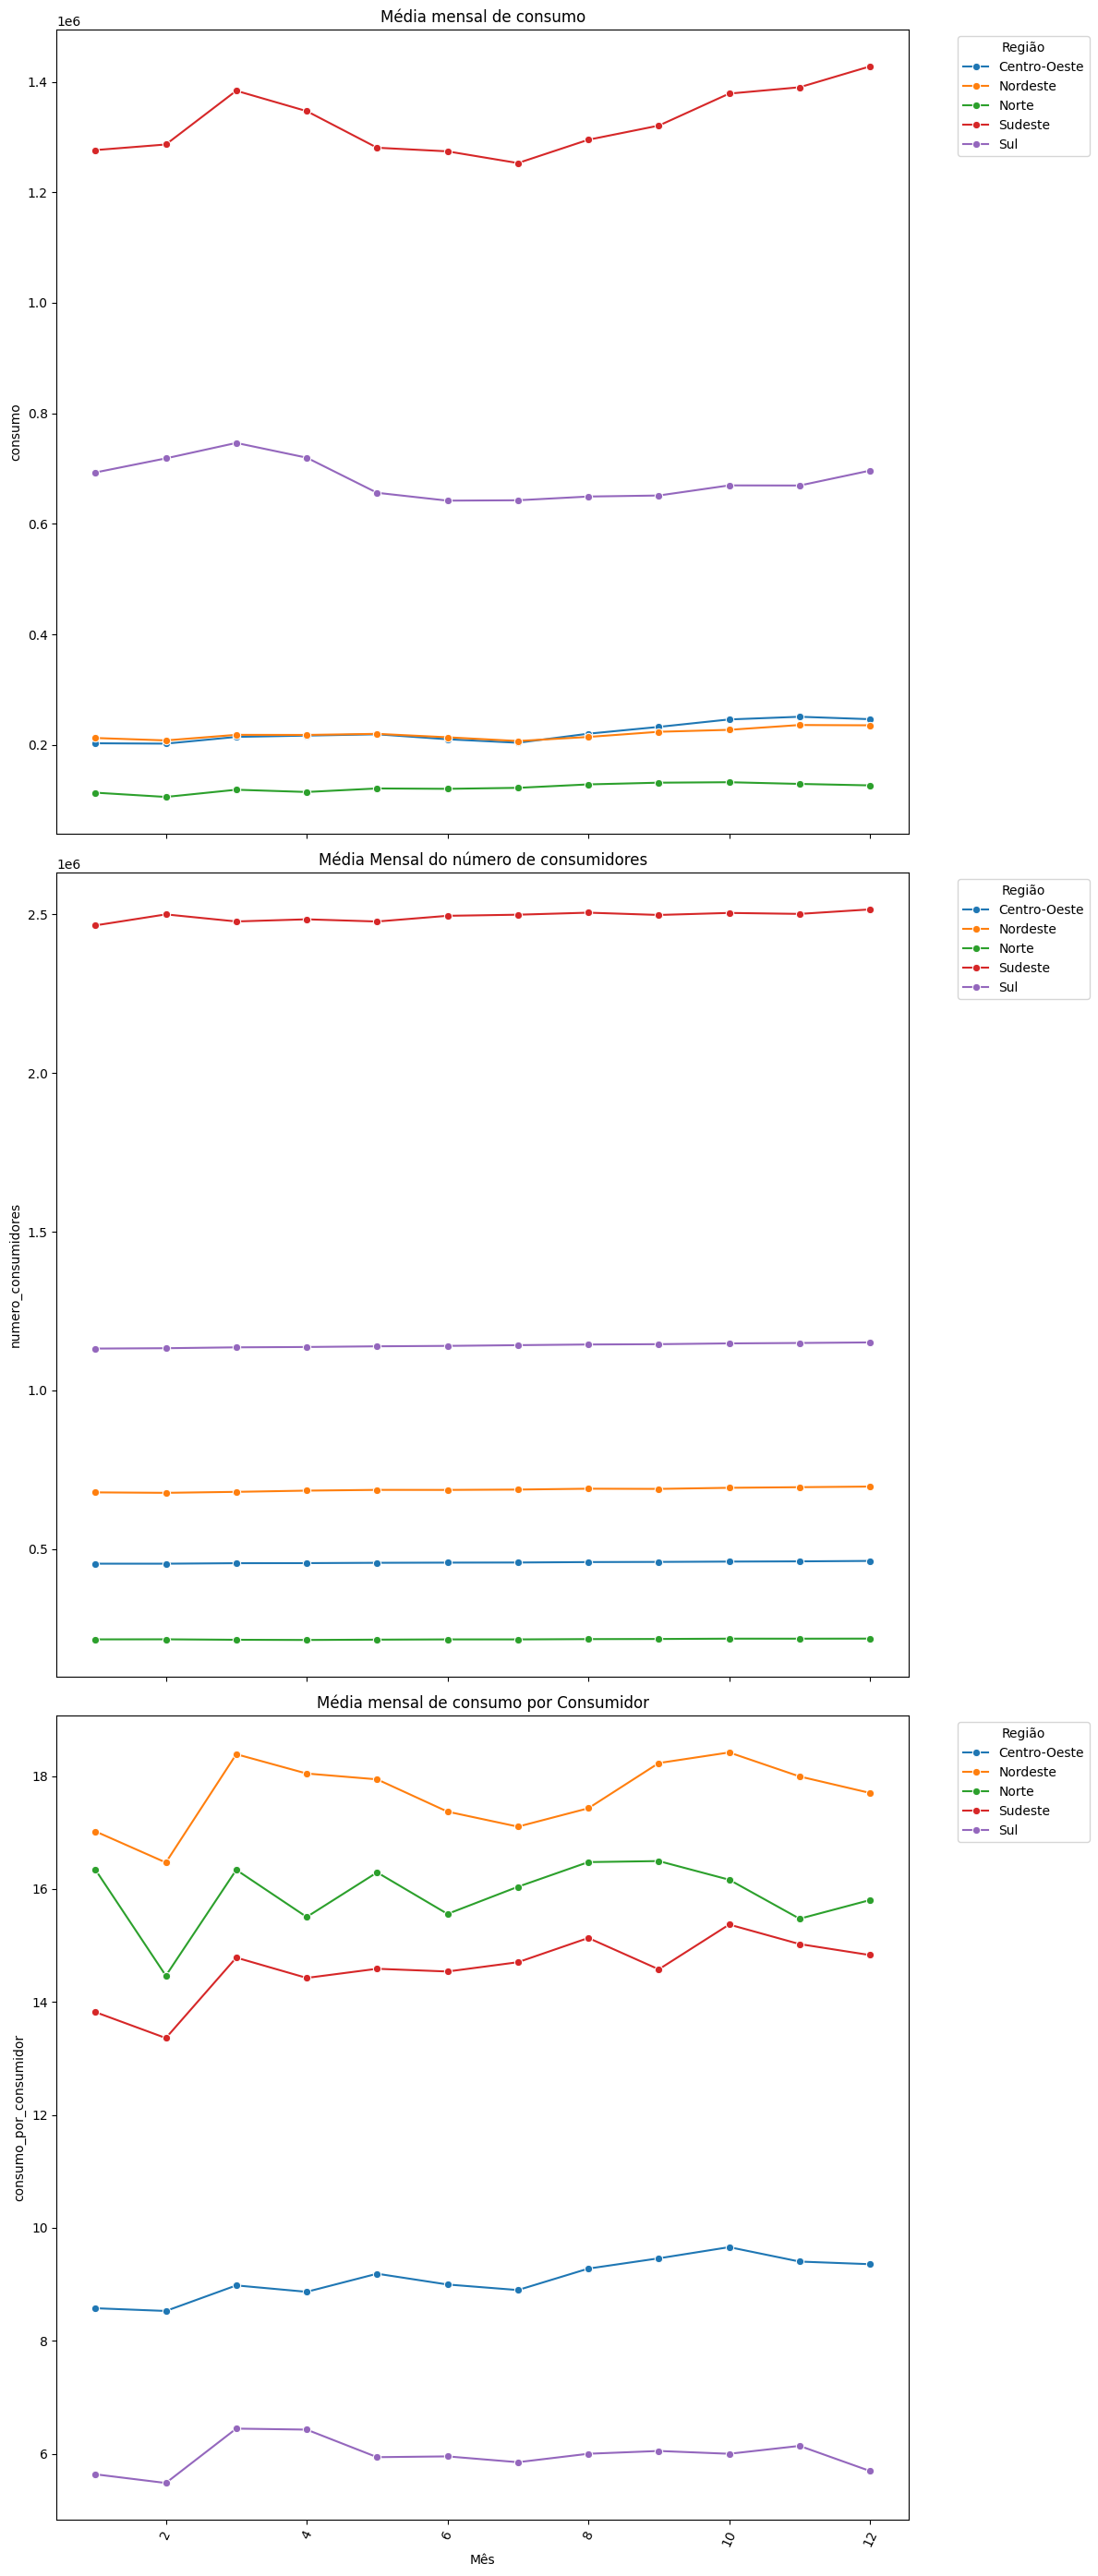

In [46]:
# Seleciona as colunas necessárias

df_filtrado=df_reset_index[df_reset_index['ano']==2023]

df_filtrado = df_filtrado[['regiao', 'mes', 'consumo', 'numero_consumidores', 'consumo_por_consumidor']]

# Agrupa por 'estado' e 'mes', calculando a média
resultado = df_filtrado.groupby(['regiao', 'mes']).mean()

resultado = resultado.sort_values(by='mes',ascending=True)

# Criando a figura e os subplots (3 linhas e 1 coluna)
fig, axes = plt.subplots(3, 1, figsize=(12, 28), sharex=True)  # 3 linhas, 1 coluna

# Configurações dos gráficos
metrics = ['consumo', 'numero_consumidores', 'consumo_por_consumidor']  # Métricas a comparar
titles = ['Média mensal de consumo', 'Média Mensal do número de consumidores', 'Média mensal de consumo por Consumidor']  # Títulos correspondentes

# Loop para criar cada gráfico
for i, (metric, title) in enumerate(zip(metrics, titles)):
    sns.lineplot(
        data=resultado, 
        x='mes', y=metric, hue='regiao', 
        ax=axes[i], marker='o'
    )
    axes[i].set_title(title)  # Define o título
    axes[i].set_ylabel(metric)  # Define o rótulo do eixo Y
    axes[i].legend(title='Região', bbox_to_anchor=(1.05, 1), loc='upper left')  # Posiciona a legenda

# Inclinar os rótulos do eixo X em 65°
for ax in axes:
    for label in ax.get_xticklabels():
        label.set_rotation(65)

# Ajusta o layout e rótulos
plt.tight_layout()
plt.xlabel('Mês')
plt.show()


O consumo mensal das regiões não apresenta tendência de alta ou baixa, e se concentra em pequenas variações dentro da mediana.

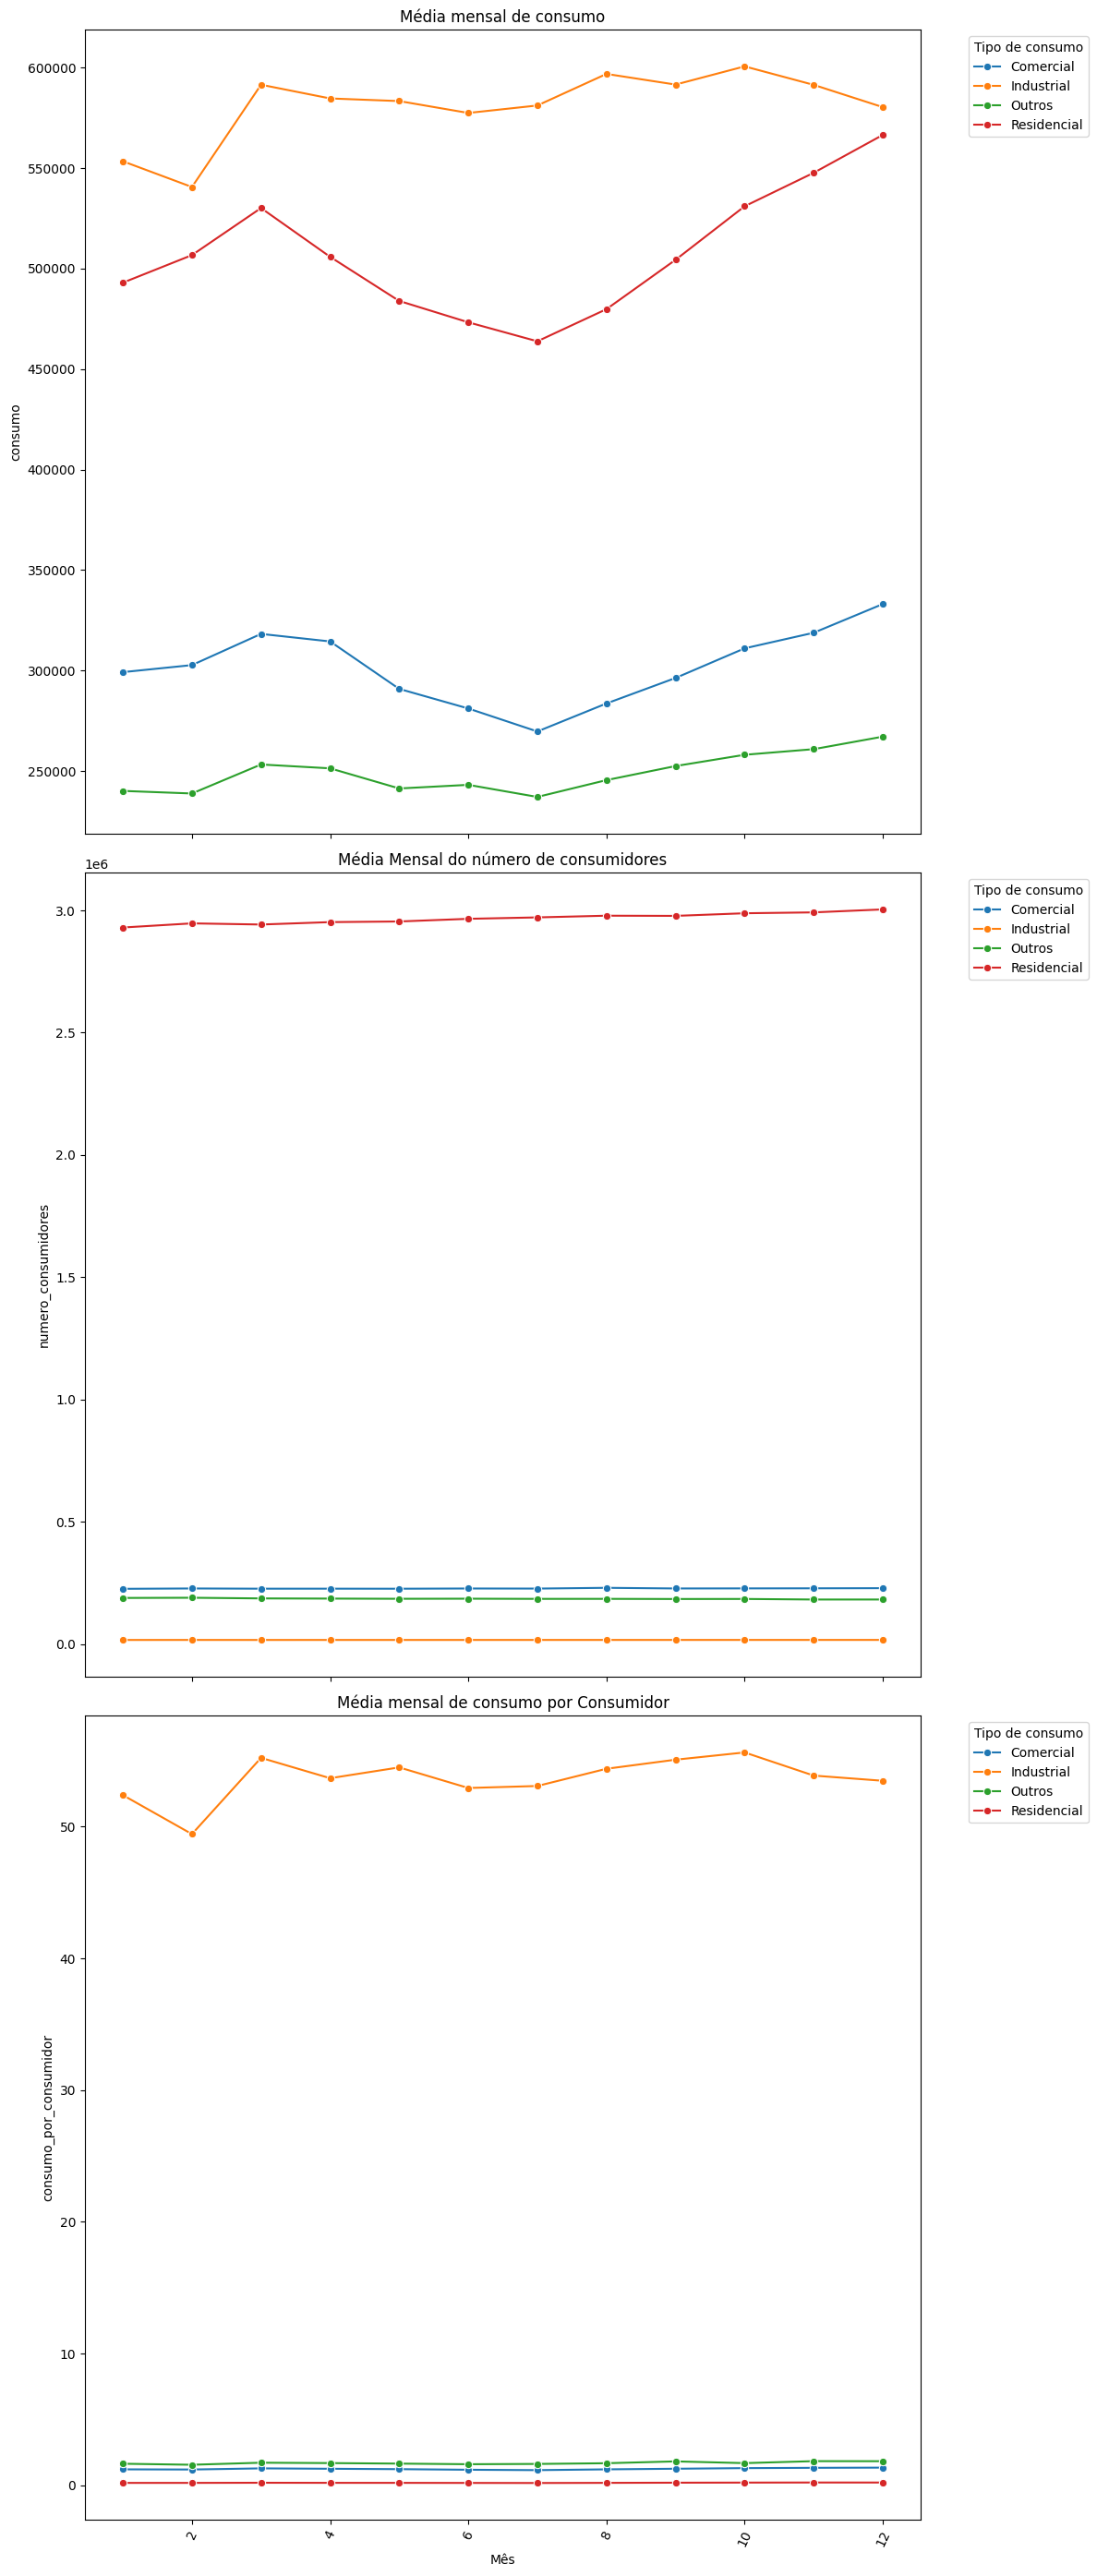

In [47]:
df_filtrado=df_reset_index[df_reset_index['ano']==2023]

# Seleciona as colunas necessárias
df_filtrado = df_filtrado[['mes', 'consumo', 'numero_consumidores', 'consumo_por_consumidor','tipo_consumo']]

df_filtrado['tipo_consumo'] = df_filtrado['tipo_consumo'].astype(str)

# Agrupa por 'estado' e 'mes', calculando a média
resultado = df_filtrado.groupby(['tipo_consumo', 'mes']).mean()

# Criando a figura e os subplots (3 linhas e 1 coluna)
fig, axes = plt.subplots(3, 1, figsize=(12, 28), sharex=True)  # 3 linhas, 1 coluna

# Configurações dos gráficos
metrics = ['consumo', 'numero_consumidores', 'consumo_por_consumidor']  # Métricas a comparar
titles = ['Média mensal de consumo', 'Média Mensal do número de consumidores', 'Média mensal de consumo por Consumidor']  # Títulos correspondentes

# Loop para criar cada gráfico
for i, (metric, title) in enumerate(zip(metrics, titles)):
    sns.lineplot(
        data=resultado, 
        x='mes', y=metric, hue='tipo_consumo', 
        ax=axes[i], marker='o'
    )
    axes[i].set_title(title)  # Define o título
    axes[i].set_ylabel(metric)  # Define o rótulo do eixo Y
    axes[i].legend(title='Tipo de consumo', bbox_to_anchor=(1.05, 1), loc='upper left')  # Posiciona a legenda

# Inclinar os rótulos do eixo X em 65°
for ax in axes:
    for label in ax.get_xticklabels():
        label.set_rotation(65)

# Ajusta o layout e rótulos
plt.tight_layout()
plt.xlabel('Mês')
plt.show()


Ao longo dos meses de 2023 foi notado uma redução de consumol, residencial e outros do mes de janeiro até julho, iniciando um aumento em agosto e se mantendo em tendência de alta até o final do ano. 

#### Evolução do tipo de consumo ao longo do tempo

C:\Users\andre\AppData\Local\Temp\ipykernel_16920\650612133.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtrado['ano'] = df_filtrado['ano'].astype(str)
C:\Users\andre\AppData\Local\Temp\ipykernel_16920\650612133.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtrado['tipo_consumo'] = df_filtrado['tipo_consumo'].astype(str)


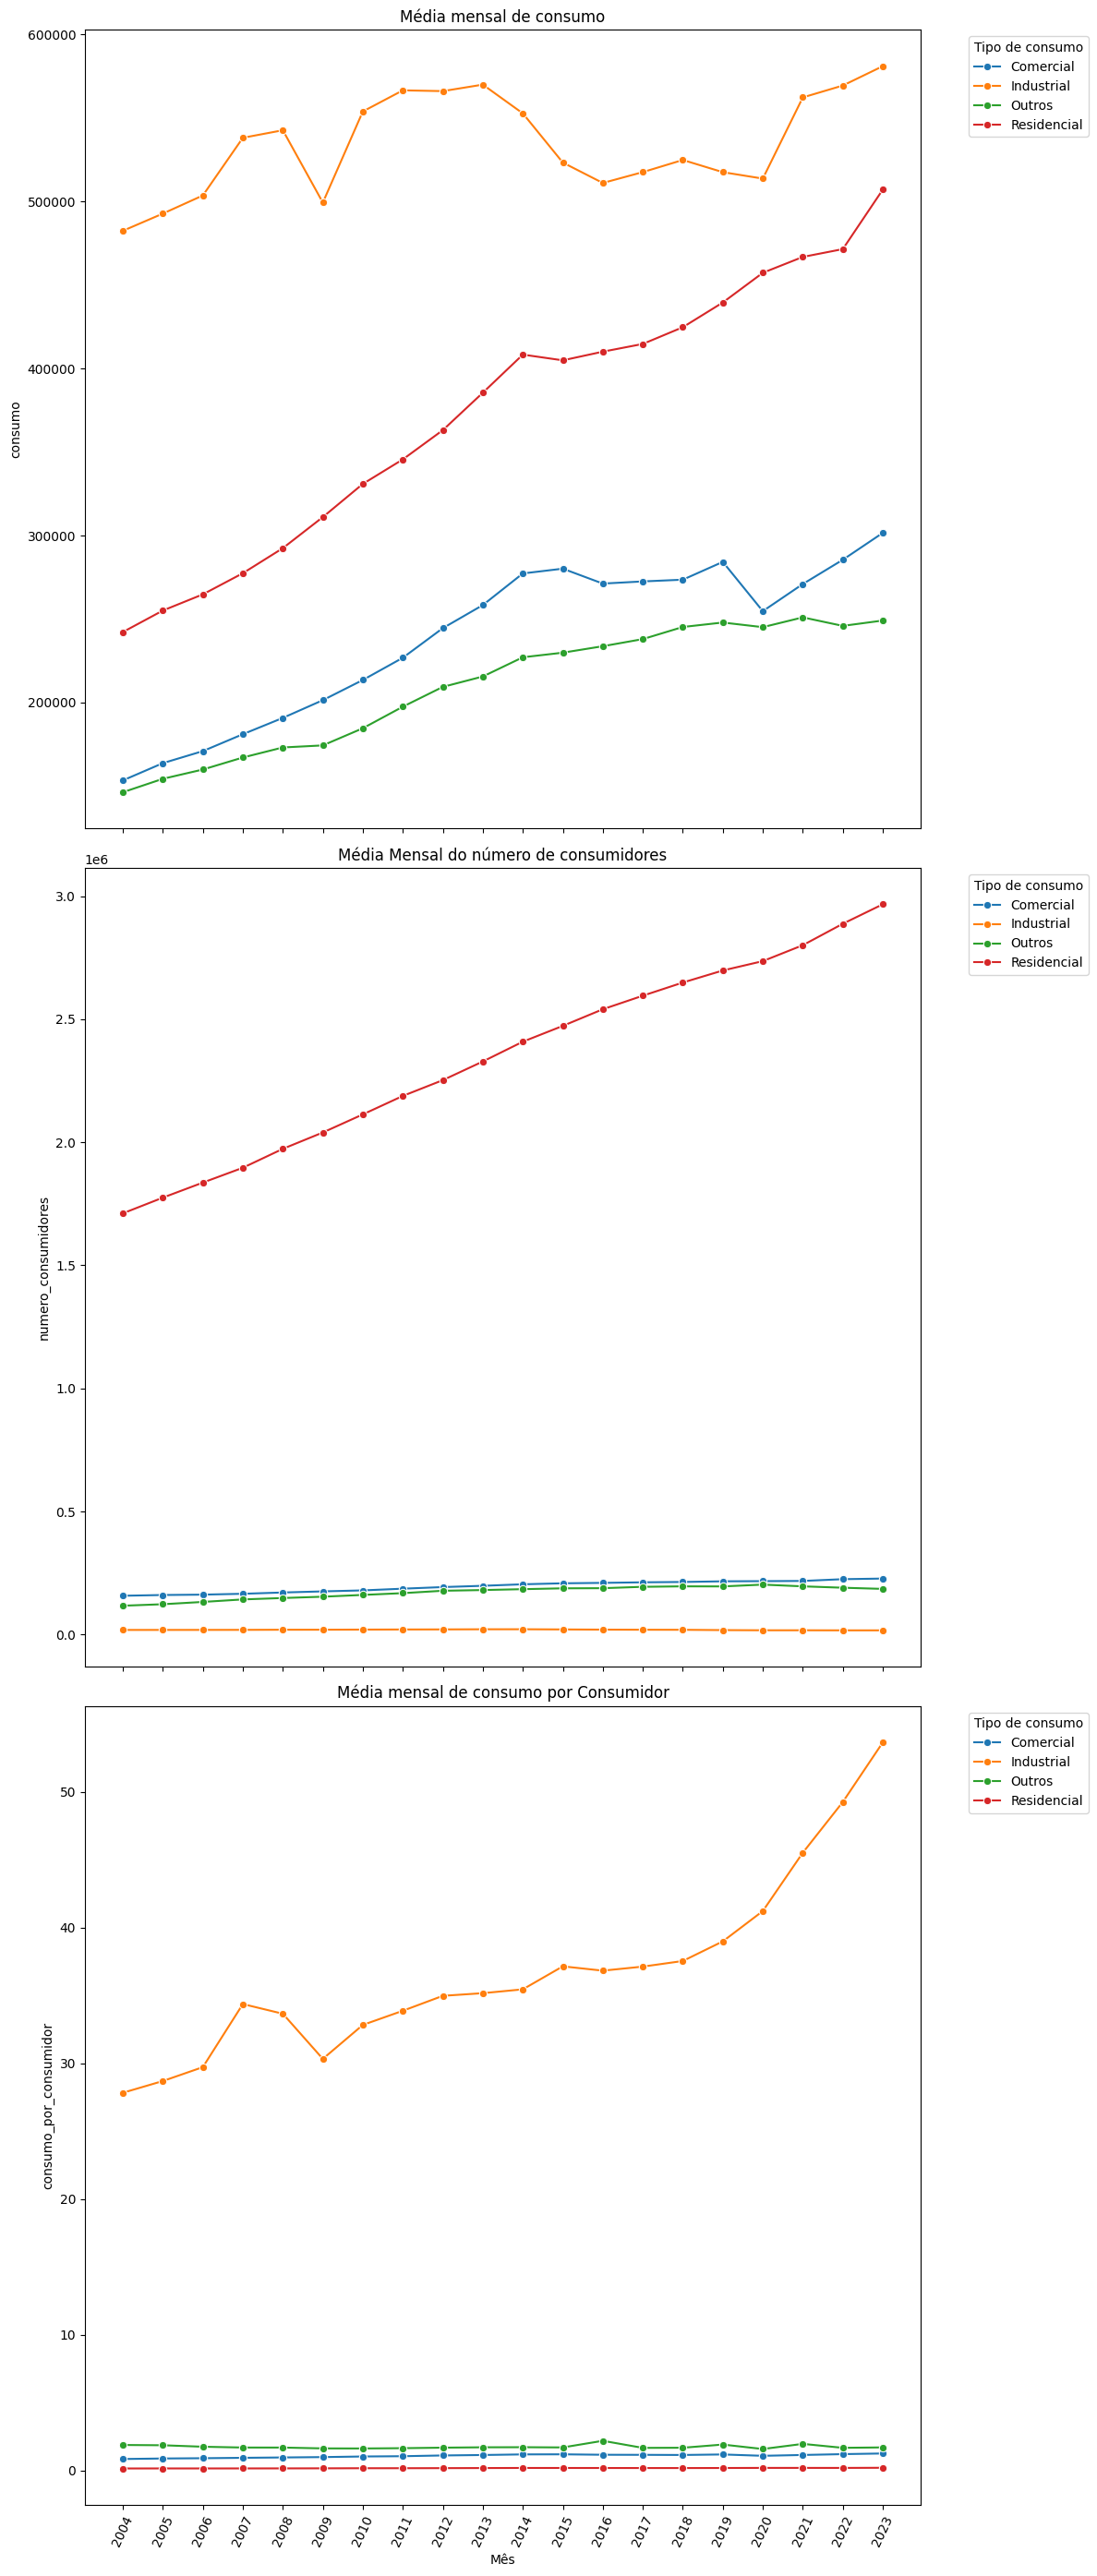

In [48]:
# Seleciona as colunas necessárias
df_filtrado = df_reset_index[['ano', 'consumo', 'numero_consumidores', 'consumo_por_consumidor','tipo_consumo']]

# Converte a coluna 'mes' para string
df_filtrado['ano'] = df_filtrado['ano'].astype(str)
df_filtrado['tipo_consumo'] = df_filtrado['tipo_consumo'].astype(str)

# Agrupa por 'estado' e 'ano', calculando a média
resultado = df_filtrado.groupby(['tipo_consumo', 'ano']).mean()

# Criando a figura e os subplots (3 linhas e 1 coluna)
fig, axes = plt.subplots(3, 1, figsize=(12, 28), sharex=True)  # 3 linhas, 1 coluna

# Configurações dos gráficos
metrics = ['consumo', 'numero_consumidores', 'consumo_por_consumidor']  # Métricas a comparar
titles = ['Média mensal de consumo', 'Média Mensal do número de consumidores', 'Média mensal de consumo por Consumidor']  # Títulos correspondentes

# Loop para criar cada gráfico
for i, (metric, title) in enumerate(zip(metrics, titles)):
    sns.lineplot(
        data=resultado, 
        x='ano', y=metric, hue='tipo_consumo', 
        ax=axes[i], marker='o'
    )
    axes[i].set_title(title)  # Define o título
    axes[i].set_ylabel(metric)  # Define o rótulo do eixo Y
    axes[i].legend(title='Tipo de consumo', bbox_to_anchor=(1.05, 1), loc='upper left')  # Posiciona a legenda

# Inclinar os rótulos do eixo X em 65°
for ax in axes:
    for label in ax.get_xticklabels():
        label.set_rotation(65)

# Ajusta o layout e rótulos
plt.tight_layout()
plt.xlabel('Mês')
plt.show()


Olhando o consumo ao longo dos anos, é notavel um aumento crescente principalmente em relação ao consumo residencial acompanhando a quantidade de consumidores. Ao compararmos o consumo por consumidor, o consumo industrial se destaca, pois teve um aumento considerável ao longo dos anos, com uma inclinação mais acentuada a partir de 2020.

## Conclusão

### Aplicação dos conhecimentos

Foram utilizadas as bibliotecas Python Pandas, Matplotlib e Seaborn para análise e visualização dos dados de consumo de energia elétrica ao longo dos últimos 20 anos. Essas ferramentas possibilitaram a exploração, tratamento e representação gráfica de padrões e tendências no consumo.

### Principais dificuldades e superações

Os principais desafios envolveram o tratamento adequado dos dados de entrada, organização do código e identificação de análises com maior relevância. Esses desafios foram superados com melhorias na estruturação do fluxo de trabalho, práticas de organização de variáveis e foco em análises que agregassem valor estratégico ao estudo.

### Resultados obtidos

Tendências de Consumo:
- Consumo cativo: tendência de queda desde 2015, especialmente nos estados da Bahia, Paraná e São Paulo.
- Consumo livre: crescimento acentuado nos estados de Santa Catarina, Rio de Janeiro, Rio Grande do Sul, Pernambuco, Pará, Minas Gerais, Bahia, Paraná e São Paulo.

Distribuição e Correlações:
- A distribuição do consumo apresenta outliers significativos, sobretudo no consumo industrial.
- Existe uma correlação linear aparente entre o número de consumidores e o consumo para categorias residenciais, embora desvios sejam observados devido a variações regionais ou por tipo de consumo.

Análises Regionais e Estaduais:
- Regiões Norte, Nordeste e Centro-Oeste apresentam consumo mediano inferior ao Sul e Sudeste.
- Sudeste: padrão de consumo distinto, com alta densidade de consumidores e consumo elevado, mas menor média de consumo por consumidor.
- Estados como São Paulo e Minas Gerais lideram em consumo absoluto, mas possuem médias de consumo por consumidor abaixo de estados do Norte e Centro-Oeste, devido a concentrações populacionais.

Consumo por Tipo e Região:
- Consumo per capita elevado em estados do Norte, especialmente devido à predominância do consumo industrial.
- Consumo residencial médio mensal superior em estados como Roraima, Amapá, Rondônia e Distrito Federal em comparação a São Paulo.

Comportamento Temporal:
- O consumo residencial e comercial aumentou nos últimos meses do ano, enquanto o consumo industrial cresce em março.
- Em 2023, foi observada uma queda no consumo residencial e "outros" entre janeiro e julho, seguida de uma recuperação e tendência de alta até dezembro.
- Ao longo dos anos, o consumo residencial cresceu de forma consistente, acompanhando o aumento de consumidores. O consumo industrial destacou-se com uma inclinação de crescimento mais acentuada após 2020.

### Lições aprendidas

A análise exploratória de dados (EDA) é um processo essencial, porém desafiador para documentação, exigindo planejamento e organização rigorosos.

### Melhorias futuras

- Estruturar funções para automação da criação de gráficos, garantindo maior consistência e agilidade.
- Incorporar técnicas de previsão para identificar padrões e antecipar demandas futuras de consumo.